In [1]:
import matplotlib.pyplot as plt

color_codes = [
    "#354e97",  # 深蓝色
    "#70a3c4",  # 浅蓝色
    "#c7e5ec",  # 浅蓝色
    "#f5b46f",  # 浅橙色
    "#df5b3f"   # 红色
]

colors = [
    "#354e97",  # 深蓝色
    "#70a3c4",  # 浅蓝色
    "#c7e5ec",  # 浅蓝色
    "#f5b46f",  # 浅橙色
    "#df5b3f"   # 红色
]

def plot_fid_vs_steps(steps_list, fid_values_list, labels, color_map='tab10', marker='o', 
    plot_name='FID10K vs Training Step', save_path='fid_vs_step.png', is_ax_inset=True,
    ylabel='FID10K', size=(10,6),
    color_codes_begins=0,
    color_codes_end=5,
    color_codes_reverse=False,
    colors=colors,
    ncol=1
    ):
    """
    绘制 FID 随训练步数变化的学术风格图表，支持多组数据。

    参数:
        steps_list (list of lists): 多组 FID 值列表。
        fid_values_list (list of lists): 多组训练步数列表（单位：K）。
        labels (list): 每组数据的标签。
        color_map (str): 使用的色卡名称，默认为 'tab10'。
        marker (str): 统一使用的标记样式，默认为 'o'。
        save_path (str): 图表保存路径，默认为 'fid_vs_step.png'。
    """
    # 创建图表

    plt.rcParams['font.family'] = 'DejaVu Sans'  # 使用默认衬线字体
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.dpi'] = 300

    plt.figure(figsize=size)

    # 获取色卡
    colors = colors[color_codes_begins:color_codes_end]
    if color_codes_reverse:
        colors = colors[::-1]


    # 绘制每组数据的曲线
    for i, (steps, fid_values, label) in enumerate(zip(steps_list, fid_values_list, labels)):
        color = colors[i % len(colors)]  # 循环使用色卡中的颜色
        plt.plot(steps, fid_values, marker=marker, linestyle='-', color=color, label=label)

    # 设置标题和标签
    # plt.title(plot_name, fontsize=16, fontweight='bold')
    plt.xlabel('Training Step (K)', fontsize=20)
    plt.ylabel(ylabel, fontsize=20)

    # 设置网格线（灰色）和背景（灰色）
    plt.gca().set_facecolor('#f5f5f5')  # 使用更淡的灰色作为背景颜色
    plt.grid(True, linestyle='--', alpha=0.2, color='gray')  # 网格线为灰色

    # 去掉边框
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    # 设置坐标轴范围
    all_steps = [step for steps in steps_list for step in steps]
    all_fid_values = [fid for fid_values in fid_values_list for fid in fid_values]
    plt.ylim(min(all_fid_values) - 1, max(all_fid_values) + 1)
    # plt.xlim(min(all_steps) - 1, max(all_steps) + 1)
    plt.xlim(0, max(all_steps) + 40)

    # 设置横轴和纵轴刻度字体大小
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # 添加图例
    plt.legend(fontsize=16, loc='best')

    if is_ax_inset:
        # 创建子图（放大图），缩小子图大小
        ax_inset = plt.axes([0.5, 0.4, 0.25, 0.25])  # 子图位置和大小 [left, bottom, width, height]

        # 提取子图部分的数据（step 500～700）
        subplot_fid_values = []
        for i, (steps, fid_values) in enumerate(zip(steps_list, fid_values_list)):
            sub_steps = []
            sub_fid_values = []
            for step, fid in zip(steps, fid_values):
                if 500 <= step <= 700:  # 只保留 step 500～700 的数据
                    sub_steps.append(step)
                    sub_fid_values.append(fid)
            subplot_fid_values.extend(sub_fid_values)  # 收集所有子图部分的 FID 值
            color = colors[i % len(colors)]
            ax_inset.plot(sub_steps, sub_fid_values, marker=marker, linestyle='-', color=color, label=labels[i])

        # 设置子图的范围为 step 500～700，并根据子图部分的 FID 值动态设置 ylim
        ax_inset.set_xlim(500, 800)
        if subplot_fid_values:  # 如果子图部分有数据
            y_min = min(subplot_fid_values) - 1
            y_max = max(subplot_fid_values) + 1
            ax_inset.set_ylim(y_min, y_max)

        # 设置子图的网格线和背景
        ax_inset.set_facecolor('#f5f5f5')
        ax_inset.grid(True, linestyle='--', alpha=0.2, color='gray')

        # 设置子图的刻度字体大小
        ax_inset.tick_params(axis='both', labelsize=6)  # 缩小刻度字体大小以适应更小的子图

    # 保存图表，确保边缘不留空白
    plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    # 显示图表
    plt.show()
    
def format_data(Data, begin=1, name='FID10K'):
    """
    格式化数据为绘图所需的格式。

    参数:
        Data (list): FID 数据列表。
        begin (int): 起始步数的倍数（默认从 1 开始）。
        name (str): 数据标签名称。

    返回:
        dict: 包含数据、步数和名称的字典。
    """
    DataSteps = [i * 100 for i in range(begin, len(Data) + begin)]  # 生成步数列表
    return {
        'Data': Data,
        'DataSteps': DataSteps,
        'Name': name
    }


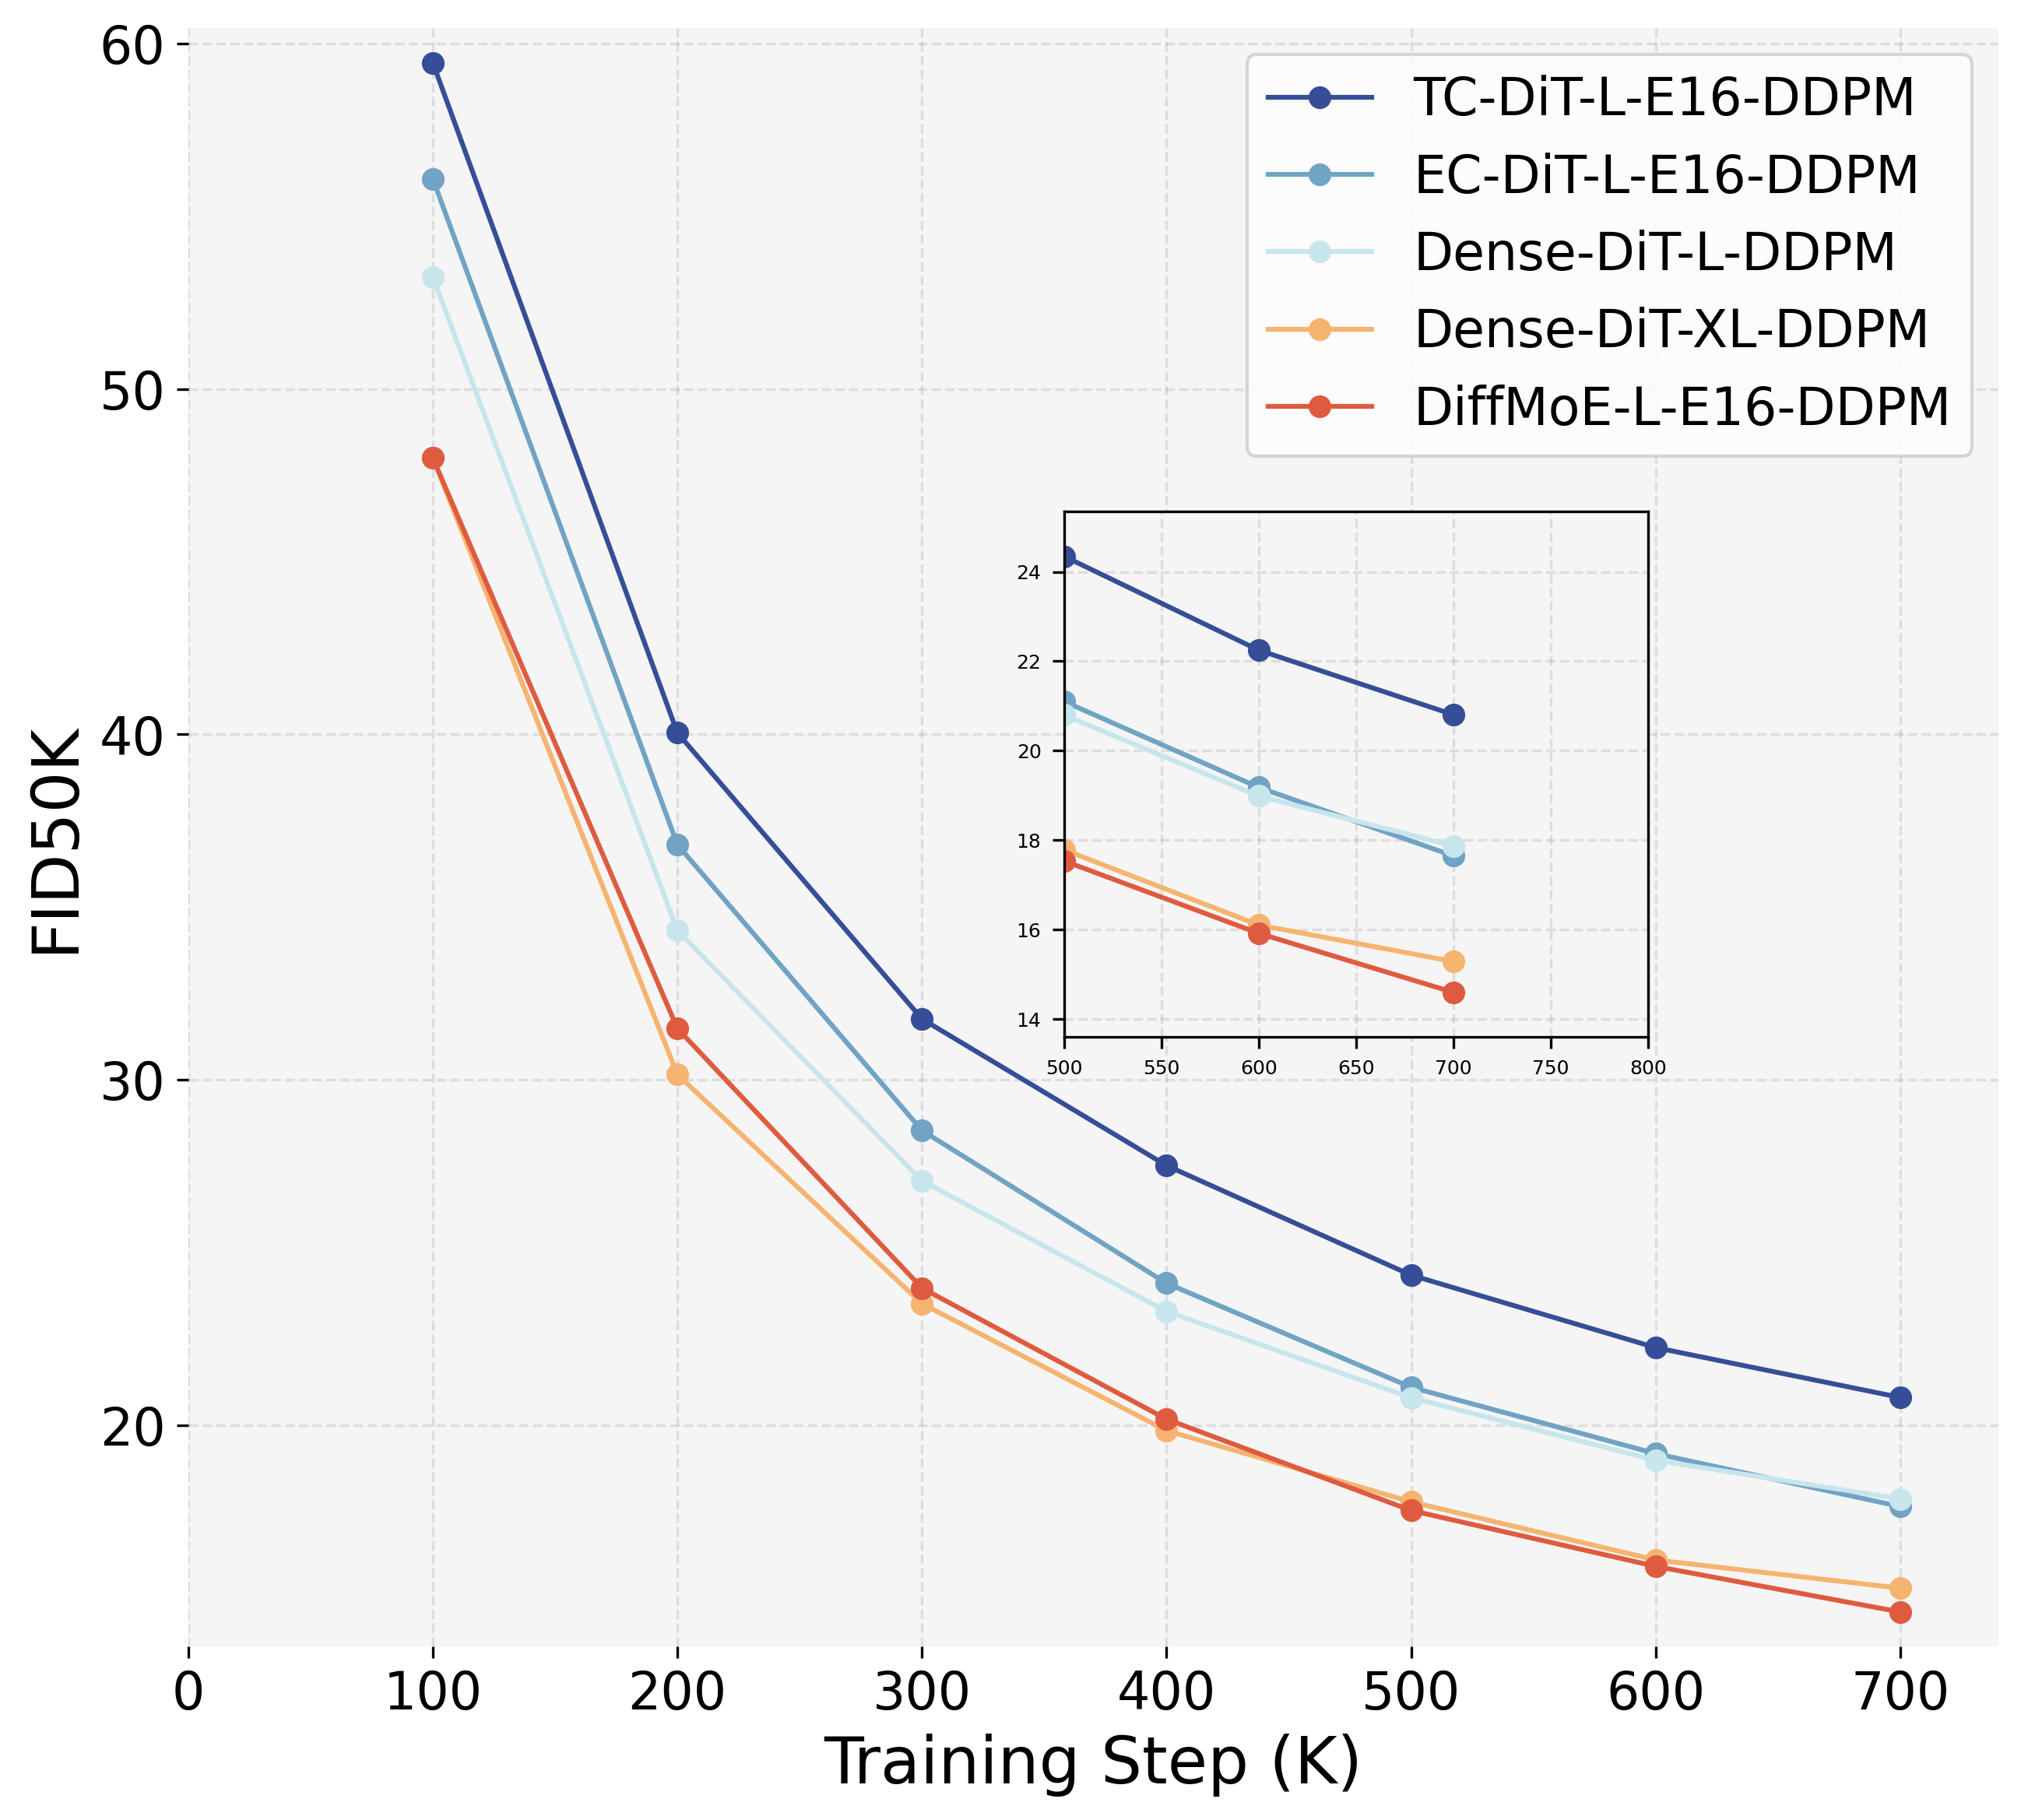

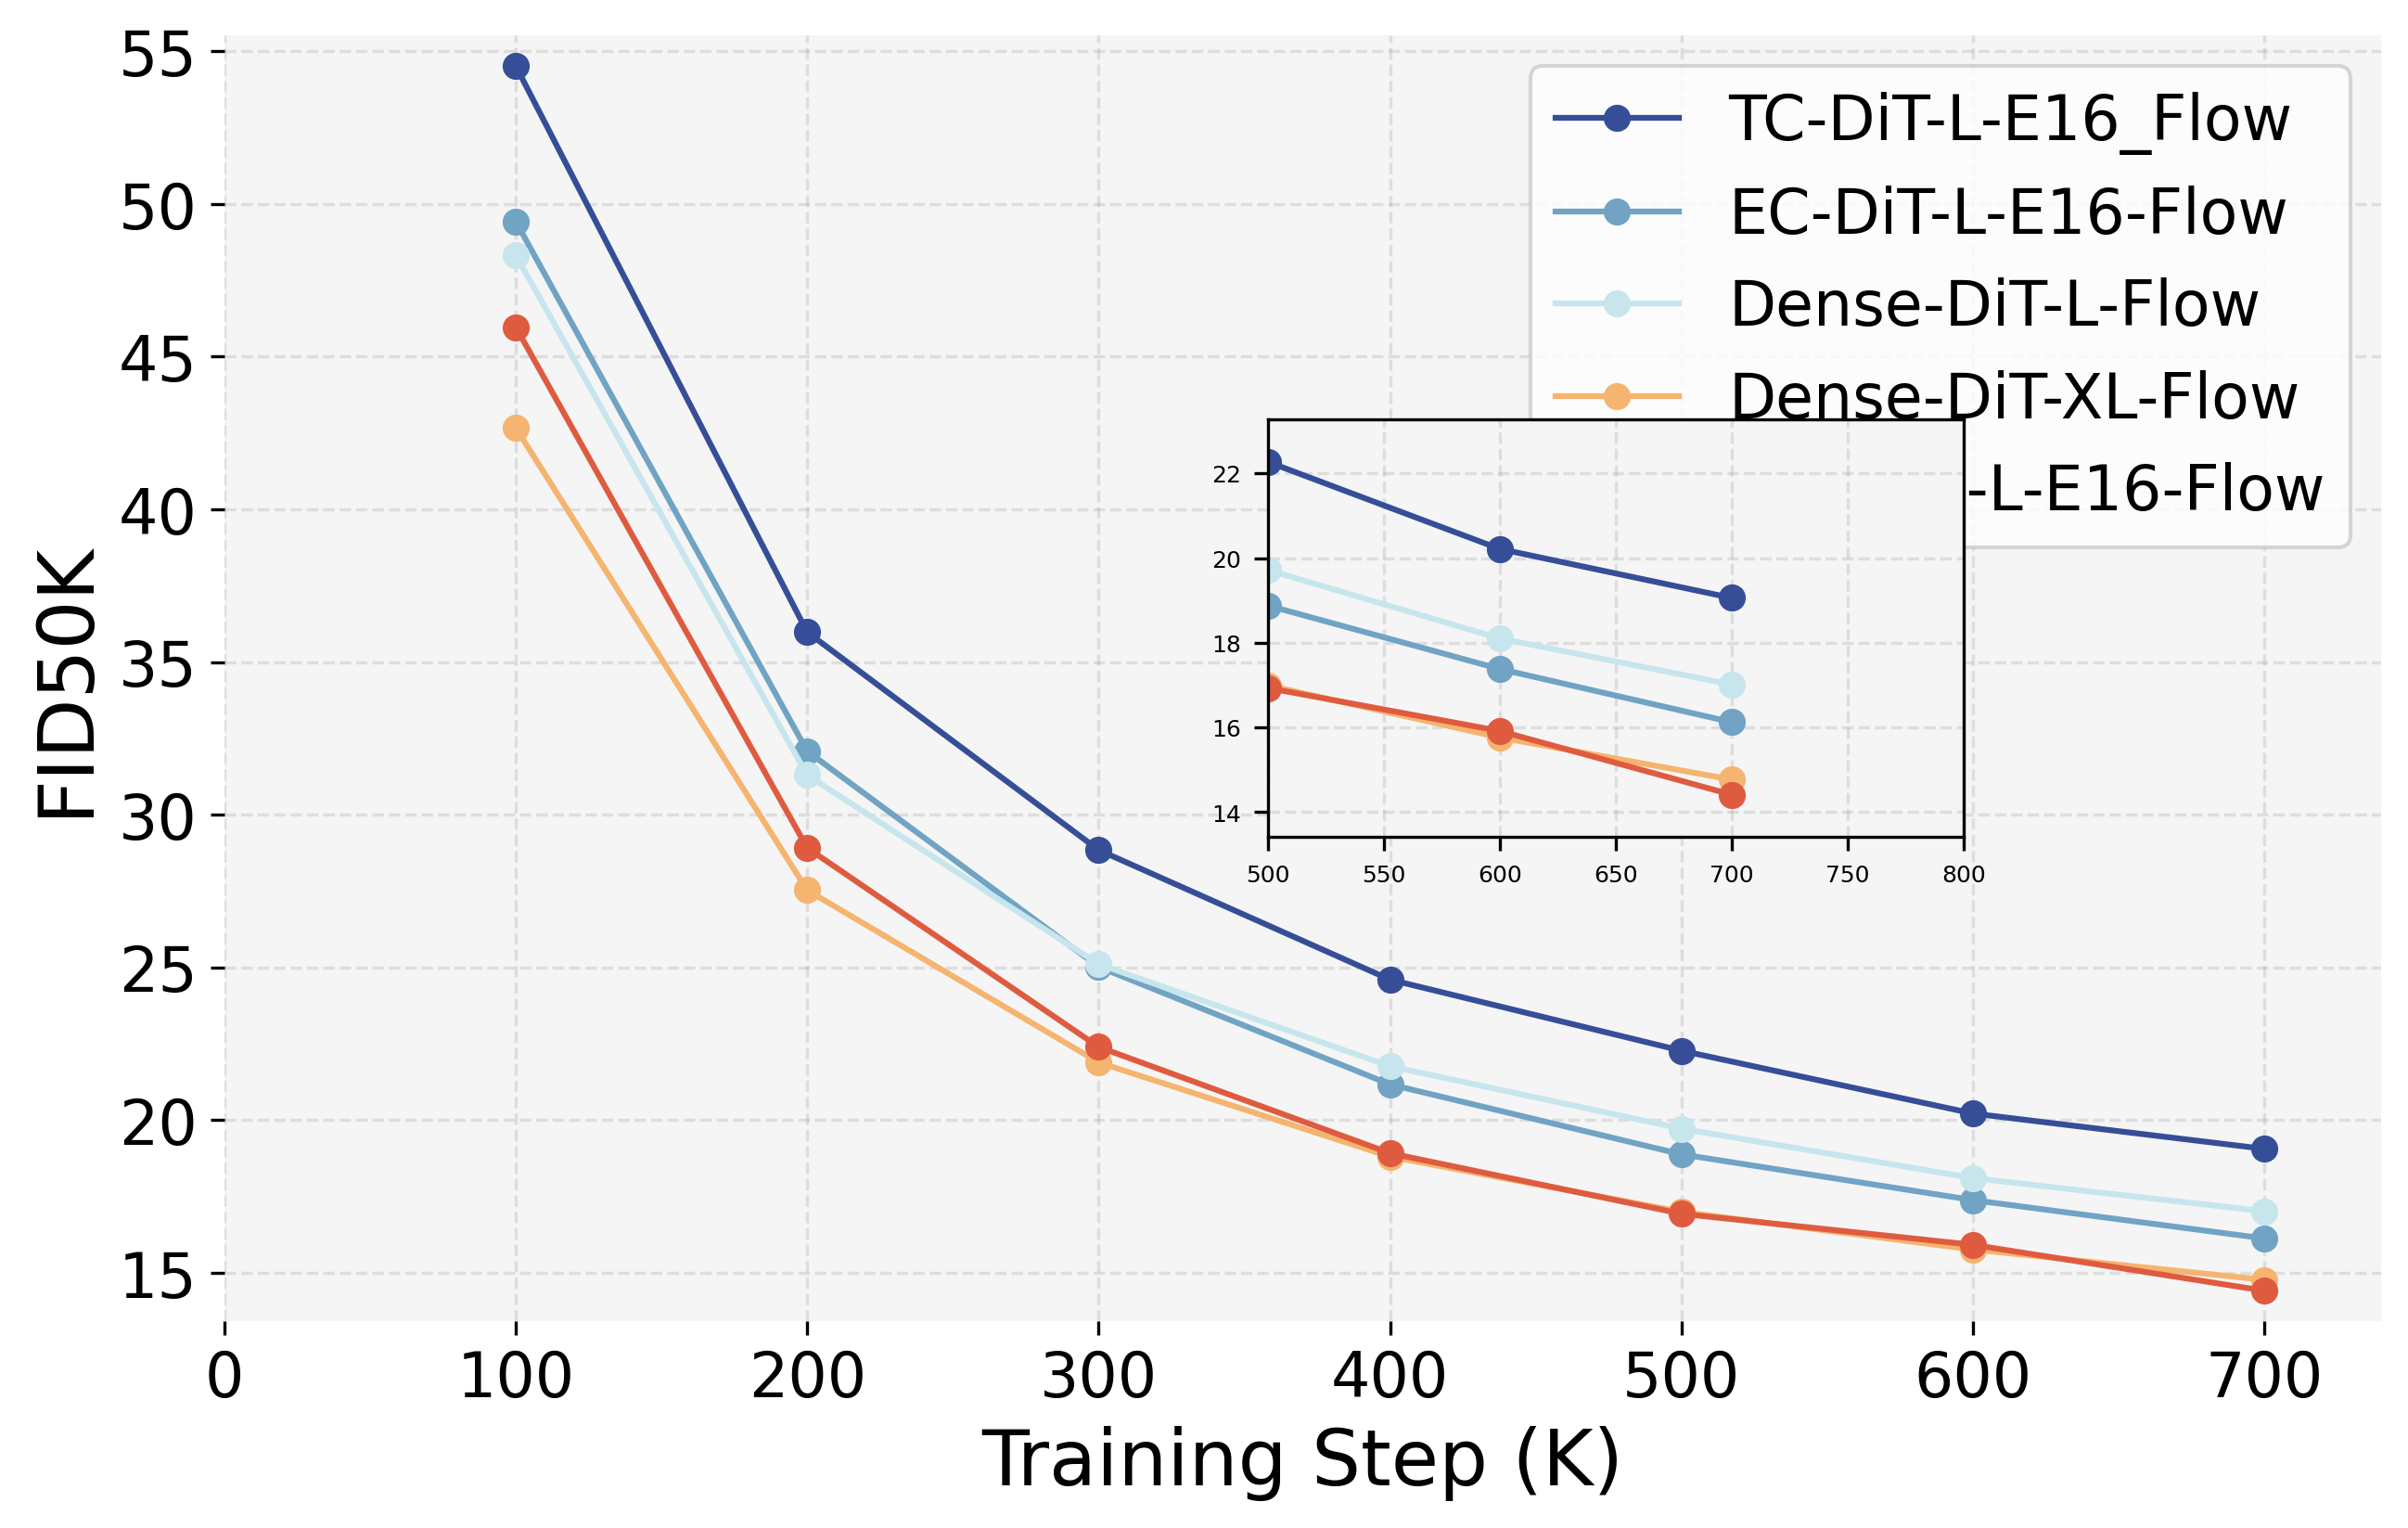

In [2]:
# 示例数据
TCDiT_L_E16_Flow_FIDs_Raw = [54.521591177023, 35.980708588802, 28.8464404265997, 24.6010537207175, 22.2734529274585, 20.2168156282466, 19.0593313896642]
ECDiT_L_E16_Flow_FIDs_Raw = [49.4305979104183, 32.082179527115, 25.0199183628719,  21.169722174325216, 18.879950663066097, 17.3813596529899, 16.1249507324669]
DenseDiT_L_Flow_FIDs_Raw = [48.3266900662732, 31.2994887767684, 25.1067092469195, 21.7645565696971, 
19.7205170169643, 18.1024154085381, 17.0145526380408]
DenseDiT_XL_Flow_FIDs_Raw = [42.66992560051023, 27.5312943473332, 21.8915707799127, 18.8037700934376, 
16.9963497168845, 15.7621219130914, 14.7693053750777]
DiffMoE_L_E16_Flow_FIDs_Raw = [45.9717735741812,28.9171632118147,22.3965190456876,18.9173286209632,16.9326297460684,15.9167143107514,14.4134596904871]
DiffMoE_L_E8_Flow_FIDs_Raw = [45.53660695,28.35350172,22.07566919,18.86929461,16.75796617,15.40754815, 14.38341318]


TCDiT_L_E16_Flow_FIDs_Raw = format_data(TCDiT_L_E16_Flow_FIDs_Raw, name='TC-DiT-L-E16_Flow')
ECDiT_L_E16_Flow_FIDs_Raw = format_data(ECDiT_L_E16_Flow_FIDs_Raw, name='EC-DiT-L-E16-Flow')
DenseDiT_L_Flow_FIDs_Raw = format_data(DenseDiT_L_Flow_FIDs_Raw, name='Dense-DiT-L-Flow')
DenseDiT_XL_Flow_FIDs_Raw = format_data(DenseDiT_XL_Flow_FIDs_Raw, name='Dense-DiT-XL-Flow')
DiffMoE_L_E16_Flow_FIDs_Raw = format_data(DiffMoE_L_E16_Flow_FIDs_Raw, name='DiffMoE-L-E16-Flow')


# 示例数据
TCDiT_L_E16_DDPM_FIDs_Raw = [59.4438106855272, 40.0488057878006, 31.76399167, 27.51944069,24.347531316039635, 22.2493938274501, 20.8061557587517]
ECDiT_L_E16_DDPM_FIDs_Raw = [56.08426885, 36.80908405, 28.53610473, 24.11334542,
    21.10162008, 19.18052342, 17.64883073]
    # , 16.72949161]
DenseDiT_L_DDPM_FIDs_Raw = [53.24638643, 34.32421489, 27.07981603, 23.29521493,
    20.79826735, 18.98839714, 17.8703735087948]
DenseDiT_XL_DDPM_FIDs_Raw = [48.005184454938, 30.1548327135977,23.5224756664201,19.8476259755499,17.784990610736,16.1026282811947,15.2856170161036]
DiffMoE_L_E16_DDPM_FIDs_Raw = [48.00518445, 31.48893661, 23.97279707, 20.17804844,
    17.53560087, 15.91671431, 14.5968144478679]


DiffMoE_L_E16_DDPM_FIDs_Raw = format_data(DiffMoE_L_E16_DDPM_FIDs_Raw, name='DiffMoE-L-E16-DDPM')
TCDiT_L_E16_DDPM_FIDs_Raw = format_data(TCDiT_L_E16_DDPM_FIDs_Raw, name='TC-DiT-L-E16-DDPM')
ECDiT_L_E16_DDPM_FIDs_Raw = format_data(ECDiT_L_E16_DDPM_FIDs_Raw, name='EC-DiT-L-E16-DDPM')
DenseDiT_L_DDPM_FIDs_Raw = format_data(DenseDiT_L_DDPM_FIDs_Raw, name='Dense-DiT-L-DDPM')
DenseDiT_XL_DDPM_FIDs_Raw = format_data(DenseDiT_XL_DDPM_FIDs_Raw, name='Dense-DiT-XL-DDPM')


DDPMBaselineFigure =  [
                    TCDiT_L_E16_DDPM_FIDs_Raw,
                    ECDiT_L_E16_DDPM_FIDs_Raw,
                    DenseDiT_L_DDPM_FIDs_Raw,
                    DenseDiT_XL_DDPM_FIDs_Raw,
                    DiffMoE_L_E16_DDPM_FIDs_Raw,
                    ]


FlowBaselineFigure =  [
                    TCDiT_L_E16_Flow_FIDs_Raw,
                    ECDiT_L_E16_Flow_FIDs_Raw,
                    DenseDiT_L_Flow_FIDs_Raw,
                    DenseDiT_XL_Flow_FIDs_Raw,
                    DiffMoE_L_E16_Flow_FIDs_Raw,
                    ]

# 调用函数绘制图表
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in DDPMBaselineFigure],
    fid_values_list=[fids['Data'] for fids in DDPMBaselineFigure],
    labels=[fids['Name'] for fids in DDPMBaselineFigure],  # 每组数据的标签
    # color_map='tab10',  # 使用 'tab10' 色卡
    marker='o',  # 统一使用圆圈标记
    save_path='[Ablation]-4-Baseline_DDPM.png',
    plot_name='[Ablation] Num Experts: FID10K over Training Step',
    ylabel='FID50K',
    is_ax_inset=True,
    size=(10, 9)

)

# 调用函数绘制图表
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in FlowBaselineFigure],
    fid_values_list=[fids['Data'] for fids in FlowBaselineFigure],
    labels=[fids['Name'] for fids in FlowBaselineFigure],  # 每组数据的标签
    # color_map='tab10',  # 使用 'tab10' 色卡
    marker='o',  # 统一使用圆圈标记
    save_path='[Ablation]-4-Baseline_Flow.png',
    plot_name='[Ablation] Num Experts: FID50K over Training Step',
    ylabel='FID50K',
    is_ax_inset=True,
    ncol=2,
    size=(10, 6)
)

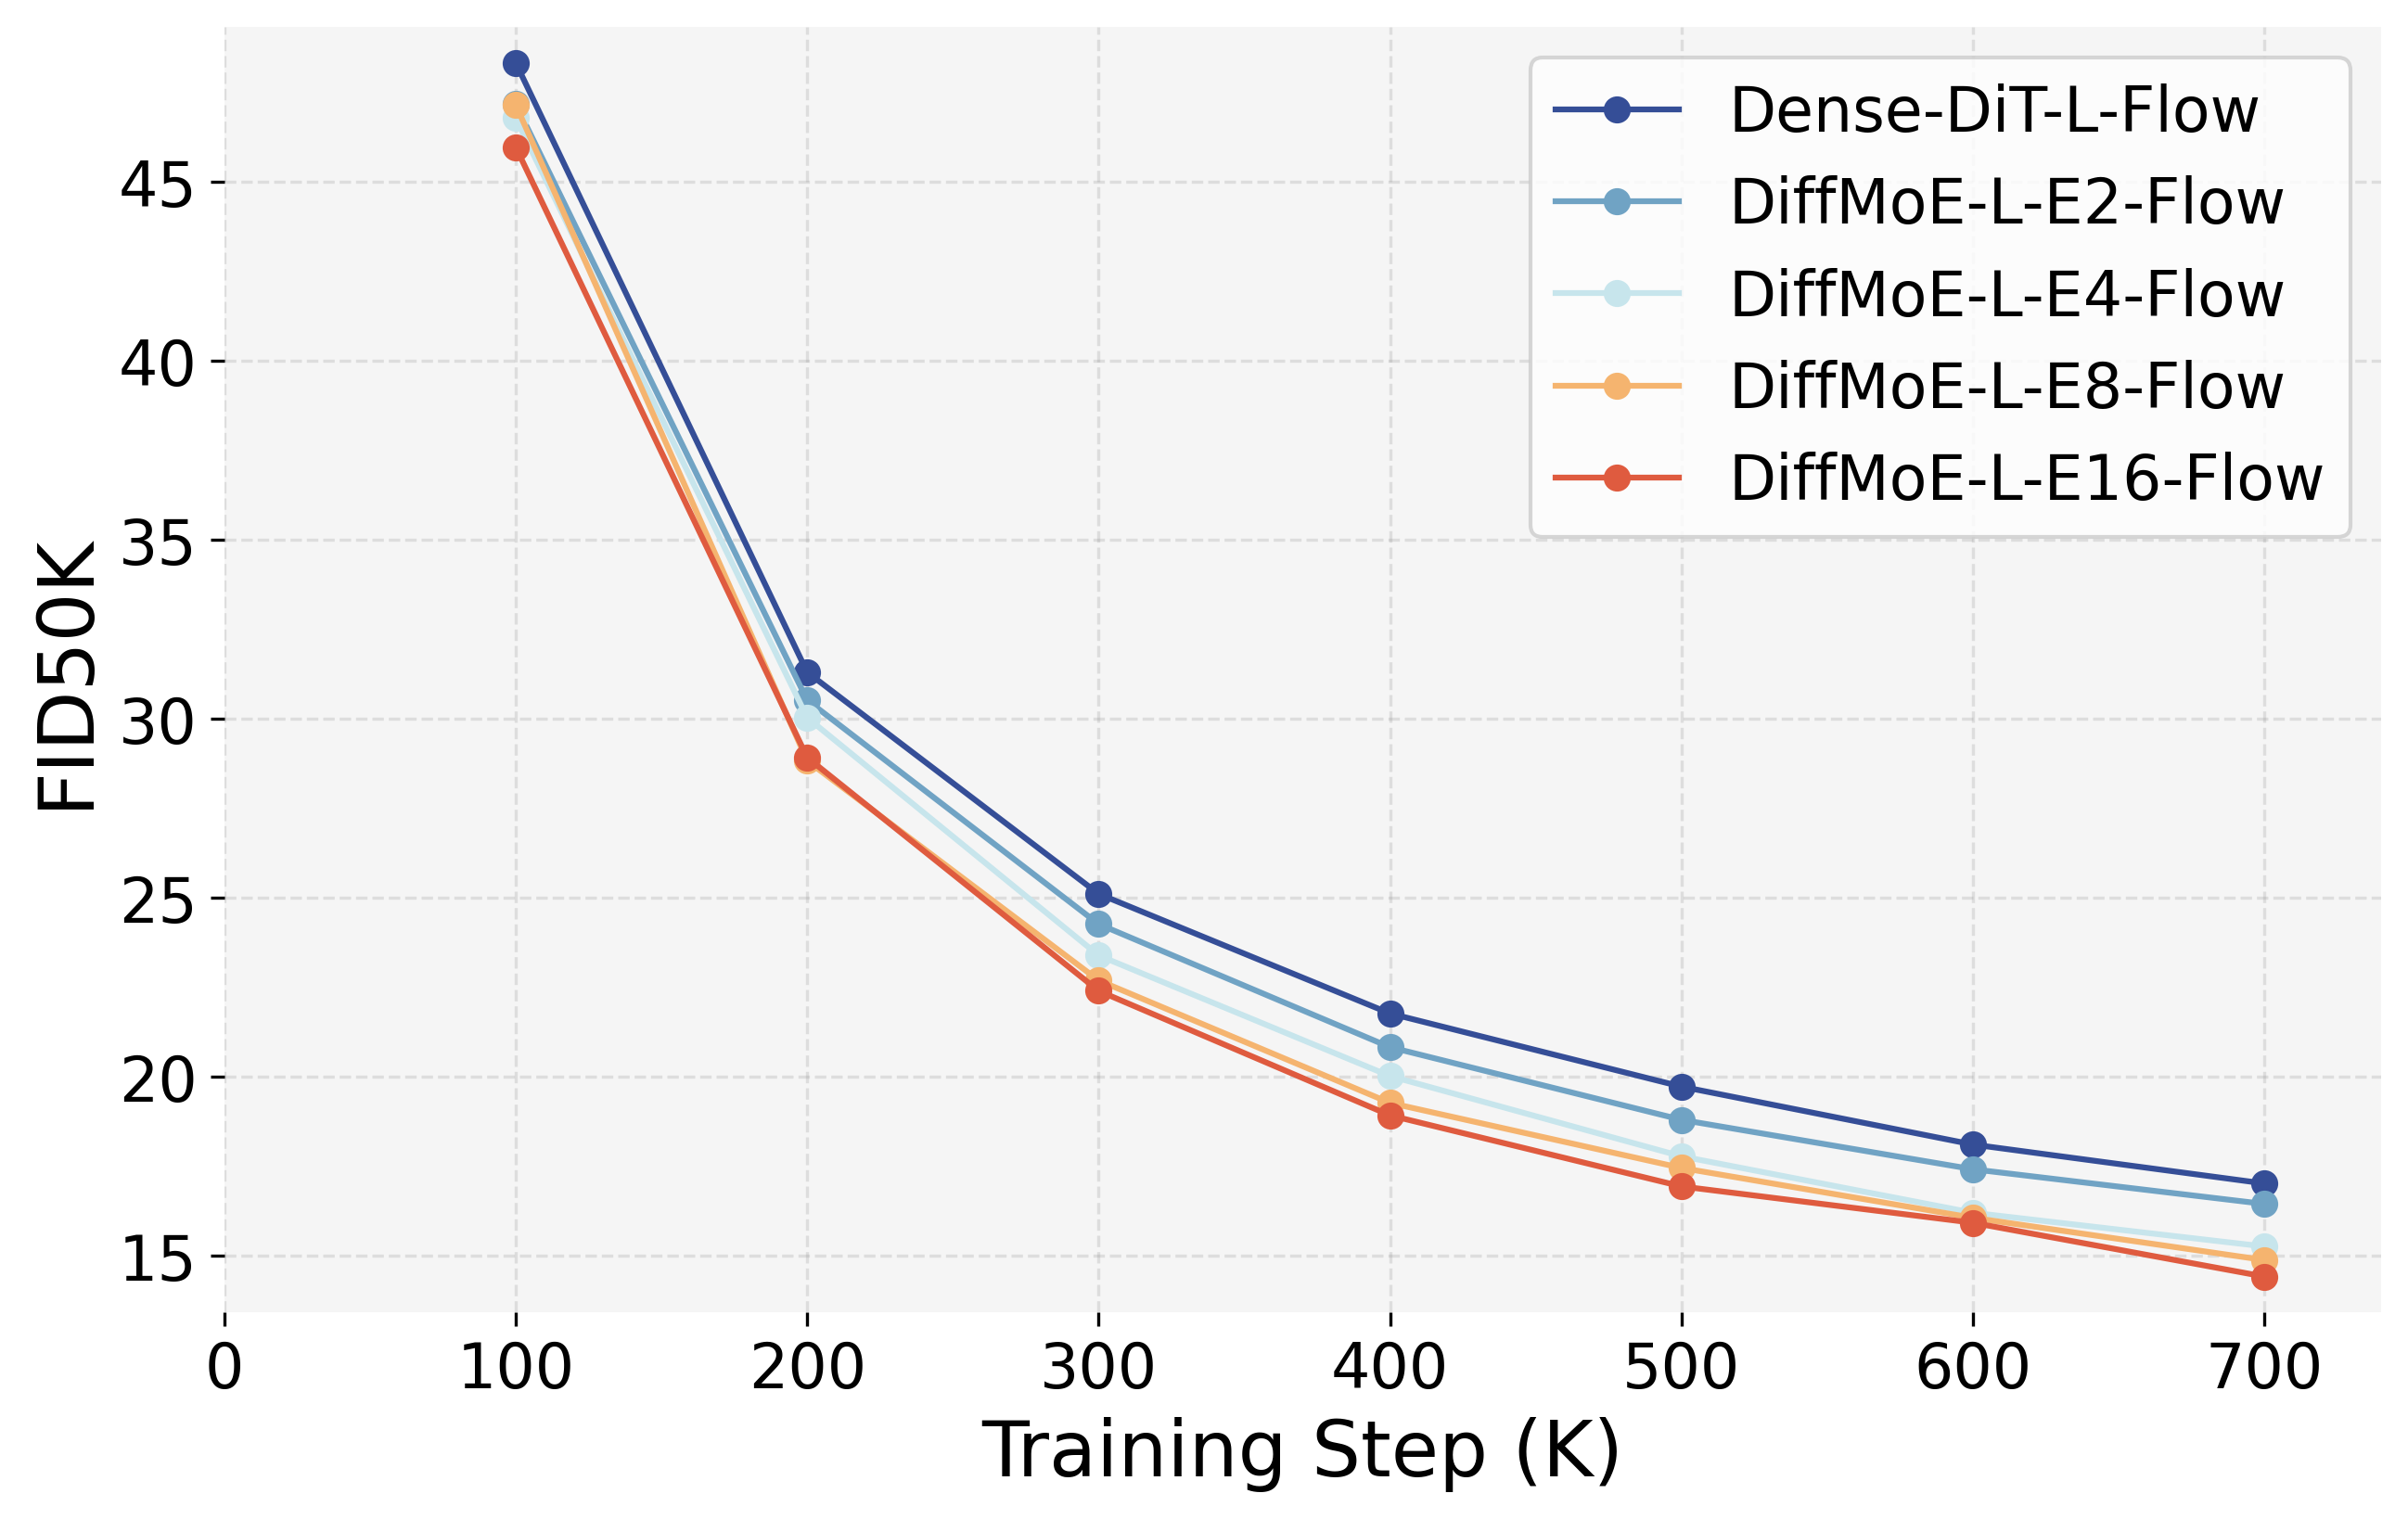

In [3]:
# 示例数据
Flow_DyDiT_E16_ThredDy_FIDs_Raw = [45.97177357, 28.91716321, 22.39651905, 18.91732862, 16.93262975, 15.91671431, 14.41345969]
# Flow_DyDiT_E8_ThredDy_FIDs_Raw_Gbs256Gpu8 = [49.0331194982318, 31.52486890369738, 25.443520439116185, 21.7467314721546, 19.5796945014163, 18.4492575499379]
Flow_DyDiT_E8_ThredDy_FIDs_Raw_Gbs256Gpu4 =[47.15117978, 28.82526043, 22.68970149, 19.26520177, 17.44831513, 16.05591487, 14.87473664]

Flow_DyDiT_E4_ThredDy_FIDs_Raw = [46.78202467, 30.03137668, 23.38689374, 20.01523533, 17.77292171, 16.19668523, 15.25414091]
Flow_DyDiT_E2_ThredDy_FIDs_Raw = [47.17517319, 30.51710501, 24.261812, 20.82218468, 18.79361067, 17.4118291, 16.44217022]


Flow_DiT_Dense_L_2_FIDs_Raw = [48.32669007, 31.29948878, 25.10670925, 21.76455657, 19.72051702, 18.10241541, 17.01455264]

Flow_DiT_Dense_XL_2_FIDs_Raw = [42.6699256, 27.53129435, 21.89157078, 18.80377009, 16.99634972, 15.76212191, 14.76930538]

Flow_DyDiT_E16_ThredDy_FIDs = format_data(Flow_DyDiT_E16_ThredDy_FIDs_Raw, begin=1, name='DiffMoE-L-E16-Flow')
# Flow_DyDiT_E8_ThredDy_FIDs_Gbs256Gpu8 = format_data(Flow_DyDiT_E8_ThredDy_FIDs_Raw_Gbs256Gpu8, begin=1, name='458M_MoE_DyDiT_Flow_E8_Gbs256Gpu8_ThredDy_FID10K')
Flow_DyDiT_E8_ThredDy_FIDs_Gbs256Gpu4 = format_data(Flow_DyDiT_E8_ThredDy_FIDs_Raw_Gbs256Gpu4, begin=1, name='DiffMoE-L-E8-Flow')
Flow_DyDiT_E4_ThredDy_FIDs = format_data(Flow_DyDiT_E4_ThredDy_FIDs_Raw, begin=1, name='DiffMoE-L-E4-Flow')
Flow_DyDiT_E2_ThredDy_FIDs = format_data(Flow_DyDiT_E2_ThredDy_FIDs_Raw, begin=1, name='DiffMoE-L-E2-Flow')
Flow_DyDiT_E1_ThredDy_FIDs = format_data(Flow_DiT_Dense_L_2_FIDs_Raw, begin=1, name='Dense-DiT-L-Flow')
Flow_DiT_Dense_XL_2_FIDs= format_data(Flow_DiT_Dense_XL_2_FIDs_Raw, begin=1, name='Dense-DiT-XL-Flow')


Flow_FIDList = [
                Flow_DyDiT_E1_ThredDy_FIDs,
                Flow_DyDiT_E2_ThredDy_FIDs,
                Flow_DyDiT_E4_ThredDy_FIDs,
                # Flow_DyDiT_E8_ThredDy_FIDs_Gbs256Gpu8,
                Flow_DyDiT_E8_ThredDy_FIDs_Gbs256Gpu4,
                Flow_DyDiT_E16_ThredDy_FIDs, 
                # Flow_DiT_Dense_L_2_FIDs,
                # Flow_DiT_Dense_XL_2_FIDs
                ]


# 调用函数绘制图表
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in Flow_FIDList],
    fid_values_list=[fids['Data'] for fids in Flow_FIDList],
    labels=[fids['Name'] for fids in Flow_FIDList],  # 每组数据的标签
    # color_map='tab10',  # 使用 'tab10' 色卡
    marker='o',  # 统一使用圆圈标记
    save_path='[Ablation]-1-Num_Experts_Fid_vs_Step.png',
    plot_name='[Ablation] Num Experts: FID50K over Training Step',
    ylabel='FID50K',
    is_ax_inset=False
)

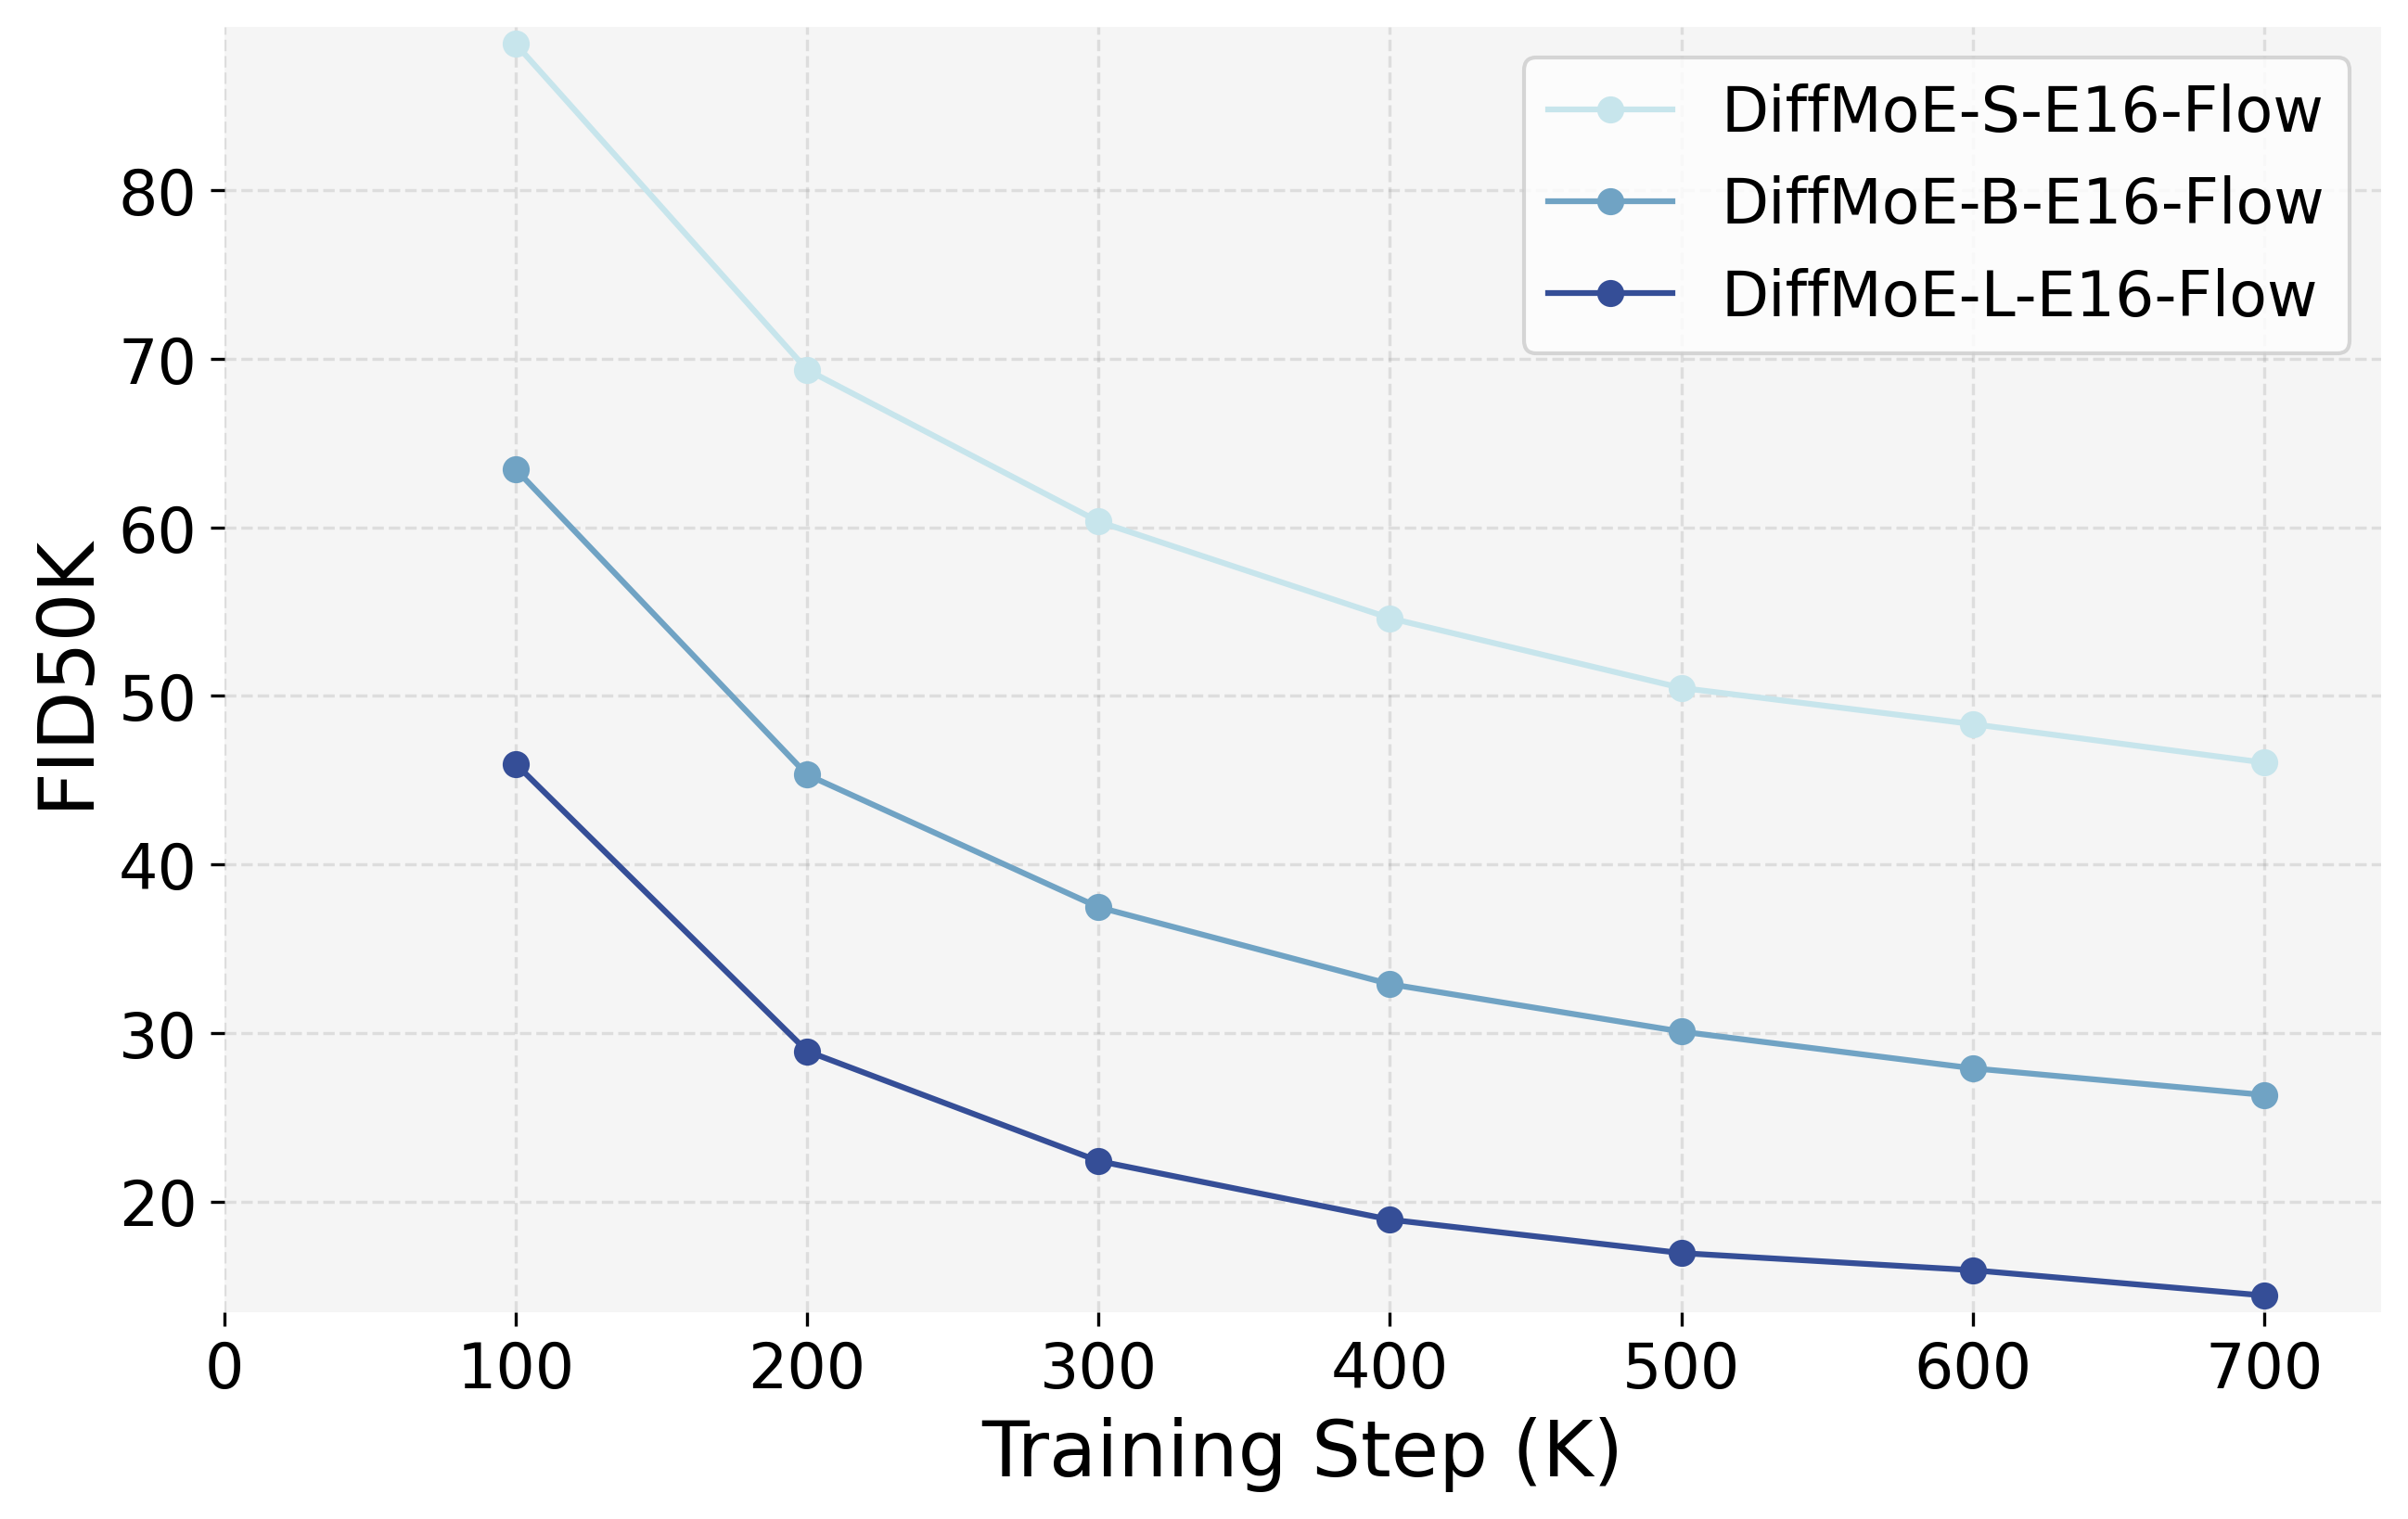

In [4]:
# 示例数据
DiffMoE_S_Flow_E16_FIDs_Raw = [
                                88.7028071294295, 69.3605574099591, 60.35195937,54.61654372,50.47802318,48.32862951,46.04297586,
                                    ]
DiffMoE_B_Flow_E16_FIDs_Raw = [
                                63.4615264610946, 45.32518384, 37.4634670754956, 32.8961664855977, #27.89949833,26.31726999,
                                30.0776255729198, 27.899498328098, 26.3172699876888
                                ]


DiffMoE_L_Flow_E16_FIDs_Raw = [45.97177357, 28.91716321, 22.39651905, 18.91732862, 16.93262975, 15.91671431, 14.41345969]


DiffMoE_S_Flow_E16_FIDs_Raw = format_data(DiffMoE_S_Flow_E16_FIDs_Raw, begin=1, name='DiffMoE-S-E16-Flow')
DiffMoE_B_Flow_E16_FIDs_Raw = format_data(DiffMoE_B_Flow_E16_FIDs_Raw, begin=1, name='DiffMoE-B-E16-Flow')
DiffMoE_L_Flow_E16_FIDs_Raw = format_data(DiffMoE_L_Flow_E16_FIDs_Raw, begin=1, name='DiffMoE-L-E16-Flow')


Flow_FIDList = [
                DiffMoE_S_Flow_E16_FIDs_Raw,
                DiffMoE_B_Flow_E16_FIDs_Raw,
                DiffMoE_L_Flow_E16_FIDs_Raw,
                # Flow_DiT_Dense_L_2_FIDs,
                # Flow_DiT_Dense_XL_2_FIDs
                ]


# 调用函数绘制图表
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in Flow_FIDList],
    fid_values_list=[fids['Data'] for fids in Flow_FIDList],
    labels=[fids['Name'] for fids in Flow_FIDList],  # 每组数据的标签
    marker='o',  # 统一使用圆圈标记
    save_path='[Ablation]-2-ScaleModelSize_Fid_vs_Step.png',
    plot_name='[Ablation] Num Experts: FID10K over Training Step',
    is_ax_inset=False,
    color_codes_begins=0,
    color_codes_end=3,
    ylabel='FID50K',
    color_codes_reverse=True,

)

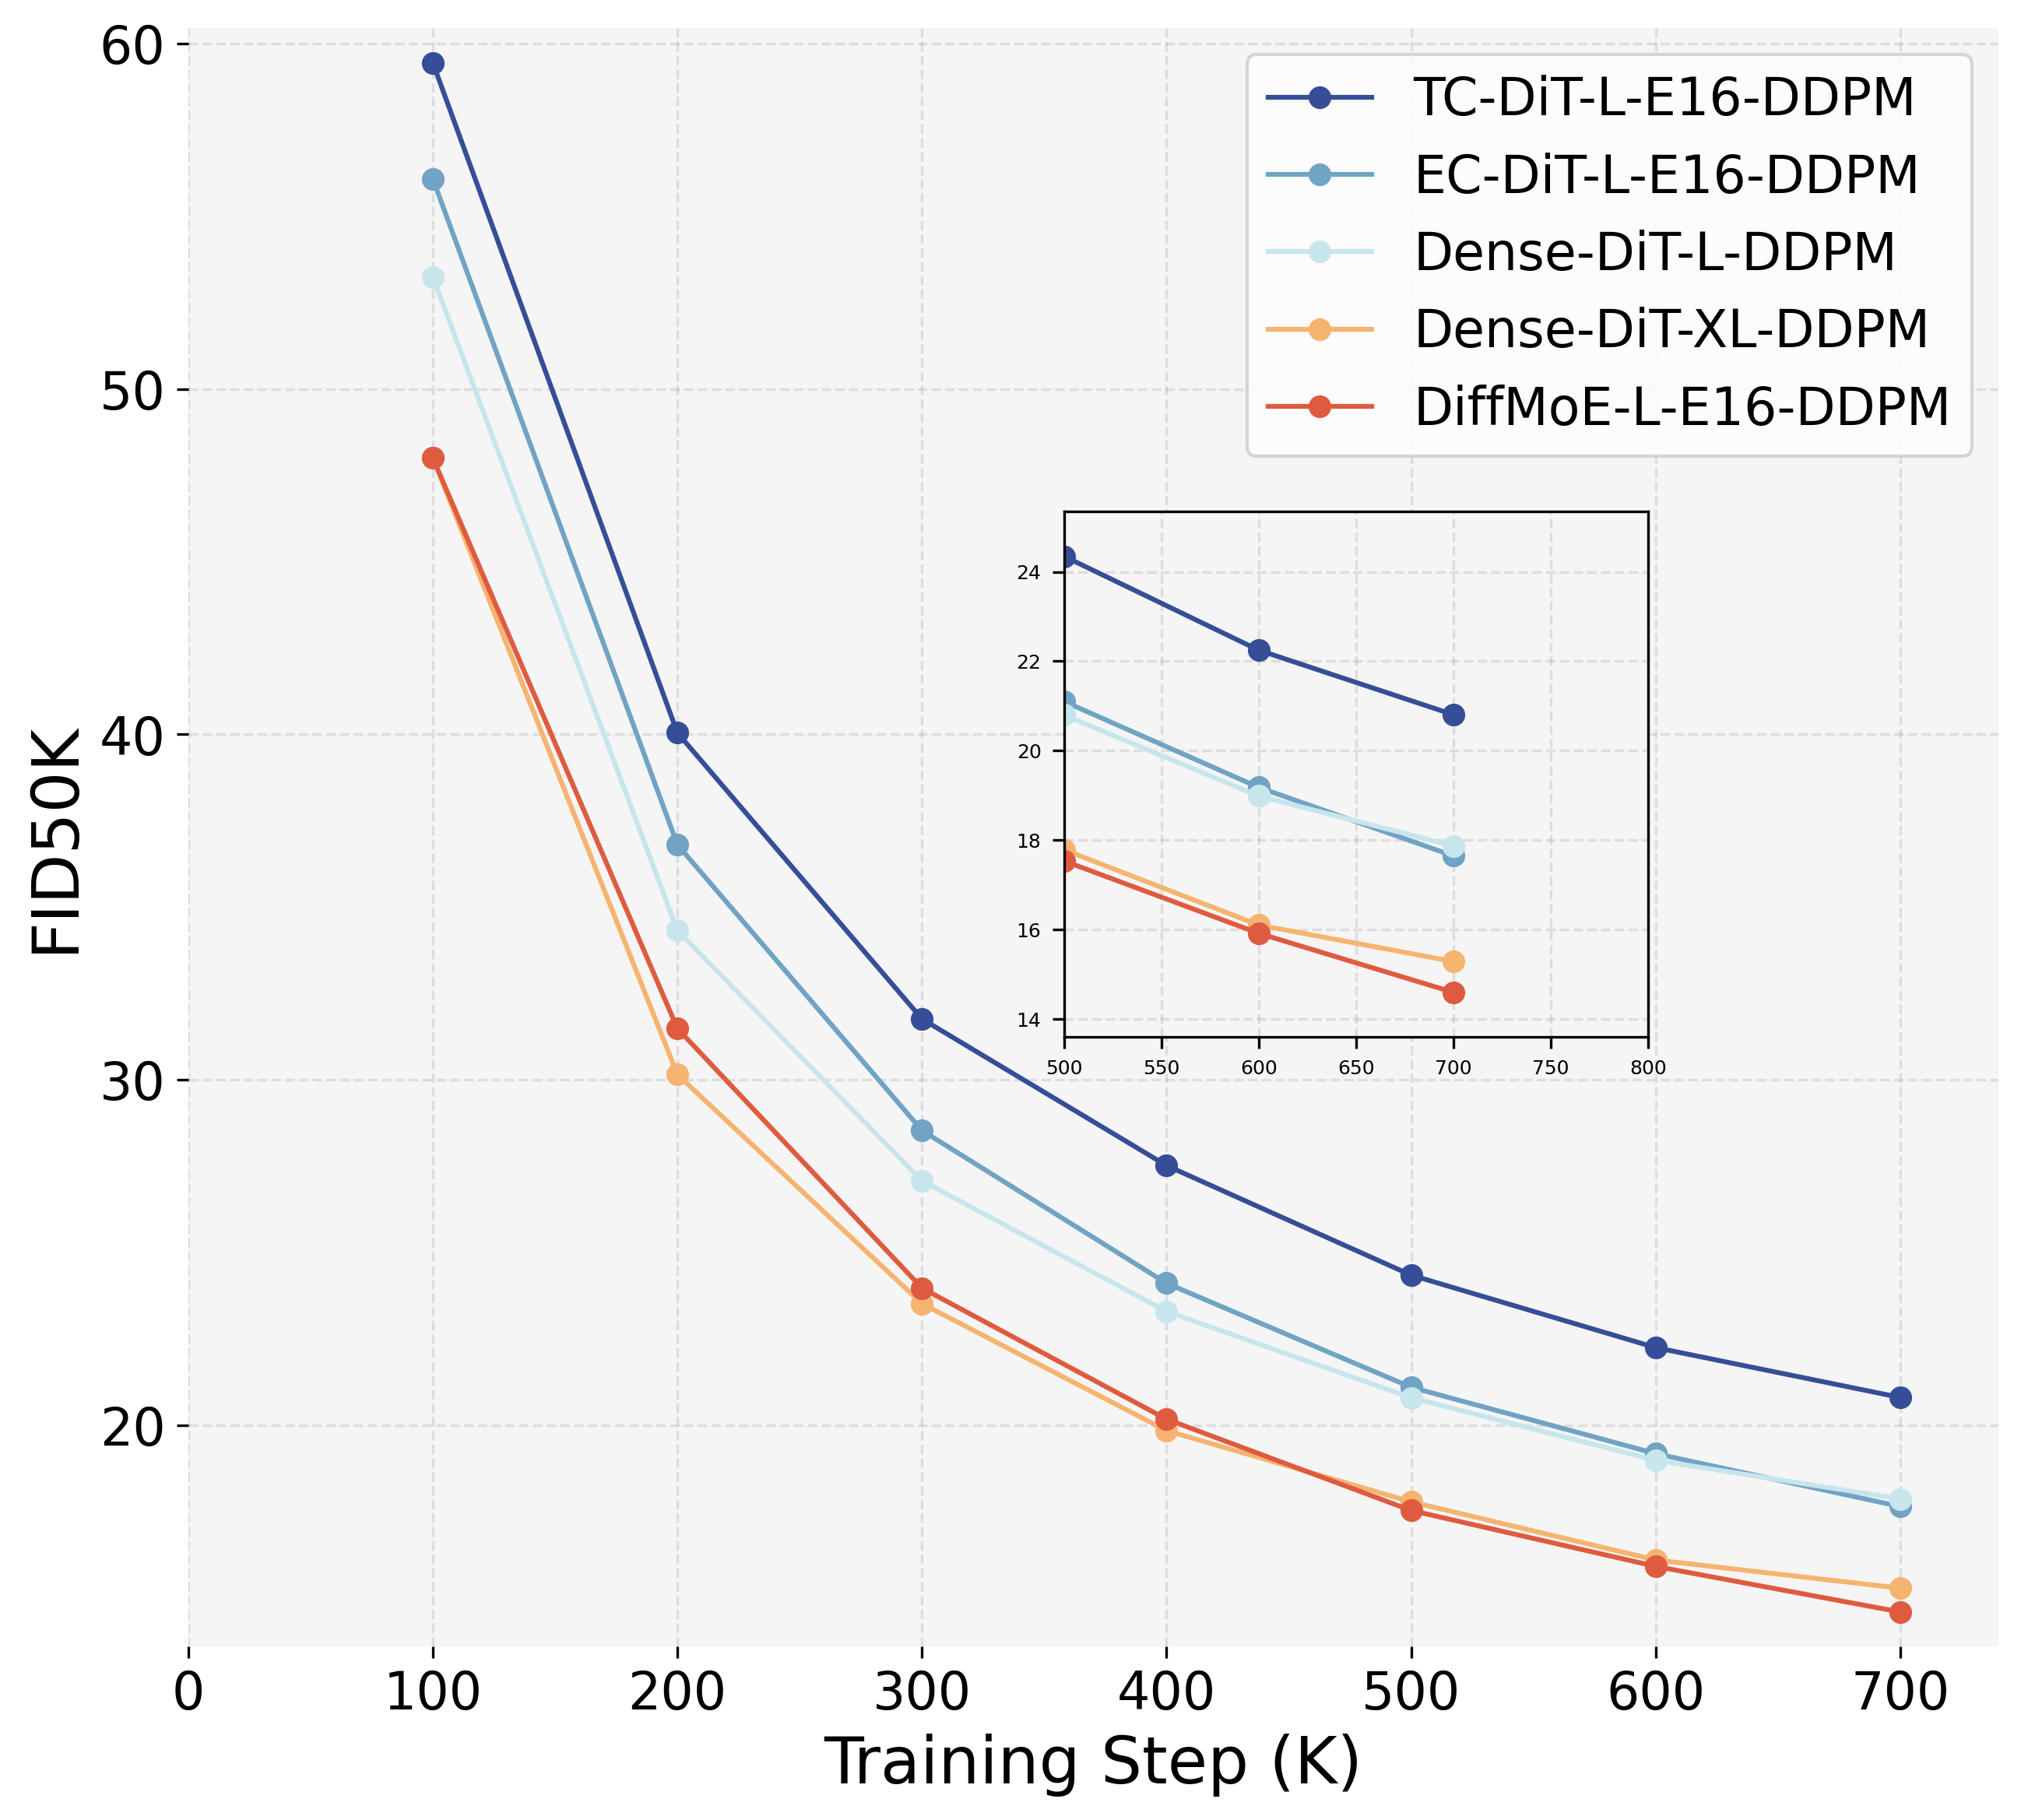

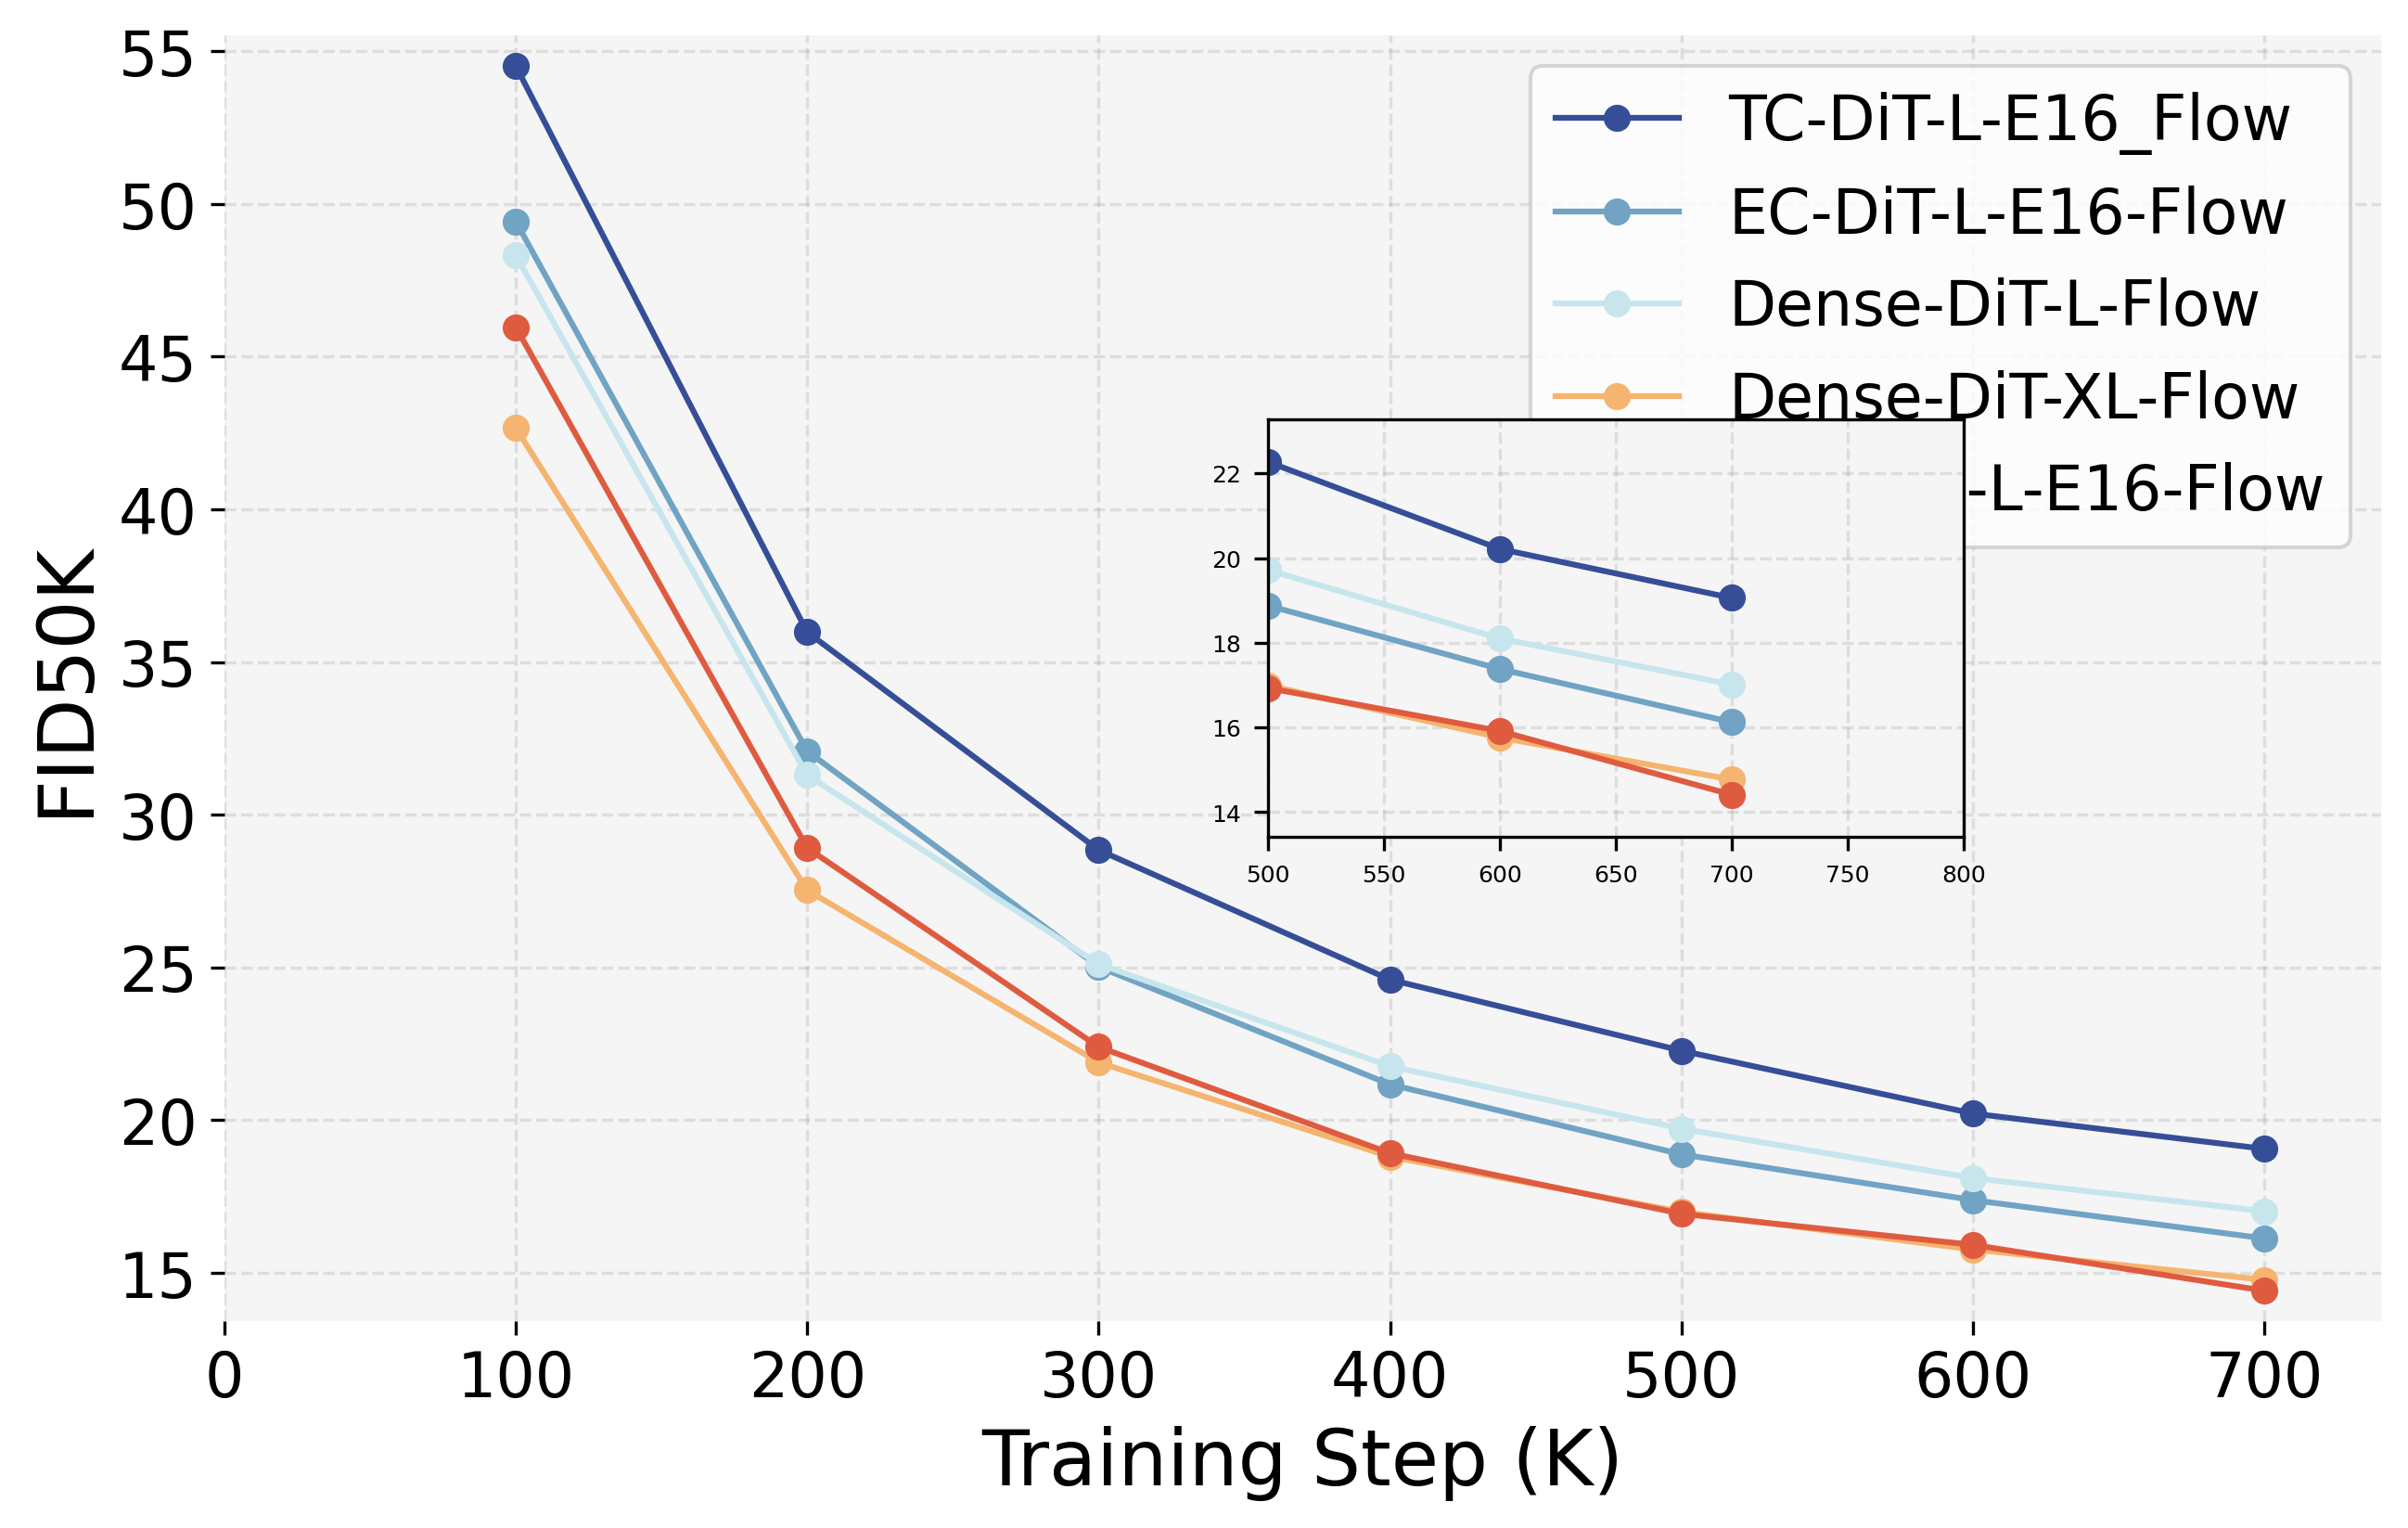

In [5]:
# 示例数据
TCDiT_L_E16_Flow_FIDs_Raw = [54.521591177023, 35.980708588802, 28.8464404265997, 24.6010537207175, 22.2734529274585, 20.2168156282466, 19.0593313896642]
ECDiT_L_E16_Flow_FIDs_Raw = [49.4305979104183, 32.082179527115, 25.0199183628719,  21.169722174325216, 18.879950663066097, 17.3813596529899, 16.1249507324669]
DenseDiT_L_Flow_FIDs_Raw = [48.3266900662732, 31.2994887767684, 25.1067092469195, 21.7645565696971, 
19.7205170169643, 18.1024154085381, 17.0145526380408]
DenseDiT_XL_Flow_FIDs_Raw = [42.66992560051023, 27.5312943473332, 21.8915707799127, 18.8037700934376, 
16.9963497168845, 15.7621219130914, 14.7693053750777]
DiffMoE_L_E16_Flow_FIDs_Raw = [45.9717735741812,28.9171632118147,22.3965190456876,18.9173286209632,16.9326297460684,15.9167143107514,14.4134596904871]
DiffMoE_L_E8_Flow_FIDs_Raw = [45.53660695,28.35350172,22.07566919,18.86929461,16.75796617,15.40754815, 14.38341318]


TCDiT_L_E16_Flow_FIDs_Raw = format_data(TCDiT_L_E16_Flow_FIDs_Raw, name='TC-DiT-L-E16_Flow')
ECDiT_L_E16_Flow_FIDs_Raw = format_data(ECDiT_L_E16_Flow_FIDs_Raw, name='EC-DiT-L-E16-Flow')
DenseDiT_L_Flow_FIDs_Raw = format_data(DenseDiT_L_Flow_FIDs_Raw, name='Dense-DiT-L-Flow')
DenseDiT_XL_Flow_FIDs_Raw = format_data(DenseDiT_XL_Flow_FIDs_Raw, name='Dense-DiT-XL-Flow')
DiffMoE_L_E16_Flow_FIDs_Raw = format_data(DiffMoE_L_E16_Flow_FIDs_Raw, name='DiffMoE-L-E16-Flow')


# 示例数据
TCDiT_L_E16_DDPM_FIDs_Raw = [59.4438106855272, 40.0488057878006, 31.76399167, 27.51944069,24.347531316039635, 22.2493938274501, 20.8061557587517]
ECDiT_L_E16_DDPM_FIDs_Raw = [56.08426885, 36.80908405, 28.53610473, 24.11334542,
    21.10162008, 19.18052342, 17.64883073]
    # , 16.72949161]
DenseDiT_L_DDPM_FIDs_Raw = [53.24638643, 34.32421489, 27.07981603, 23.29521493,
    20.79826735, 18.98839714, 17.8703735087948]
DenseDiT_XL_DDPM_FIDs_Raw = [48.005184454938, 30.1548327135977,23.5224756664201,19.8476259755499,17.784990610736,16.1026282811947,15.2856170161036]
DiffMoE_L_E16_DDPM_FIDs_Raw = [48.00518445, 31.48893661, 23.97279707, 20.17804844,
    17.53560087, 15.91671431, 14.5968144478679]


DiffMoE_L_E16_DDPM_FIDs_Raw = format_data(DiffMoE_L_E16_DDPM_FIDs_Raw, name='DiffMoE-L-E16-DDPM')
TCDiT_L_E16_DDPM_FIDs_Raw = format_data(TCDiT_L_E16_DDPM_FIDs_Raw, name='TC-DiT-L-E16-DDPM')
ECDiT_L_E16_DDPM_FIDs_Raw = format_data(ECDiT_L_E16_DDPM_FIDs_Raw, name='EC-DiT-L-E16-DDPM')
DenseDiT_L_DDPM_FIDs_Raw = format_data(DenseDiT_L_DDPM_FIDs_Raw, name='Dense-DiT-L-DDPM')
DenseDiT_XL_DDPM_FIDs_Raw = format_data(DenseDiT_XL_DDPM_FIDs_Raw, name='Dense-DiT-XL-DDPM')


DDPMBaselineFigure =  [
                    TCDiT_L_E16_DDPM_FIDs_Raw,
                    ECDiT_L_E16_DDPM_FIDs_Raw,
                    DenseDiT_L_DDPM_FIDs_Raw,
                    DenseDiT_XL_DDPM_FIDs_Raw,
                    DiffMoE_L_E16_DDPM_FIDs_Raw,
                    ]


FlowBaselineFigure =  [
                    TCDiT_L_E16_Flow_FIDs_Raw,
                    ECDiT_L_E16_Flow_FIDs_Raw,
                    DenseDiT_L_Flow_FIDs_Raw,
                    DenseDiT_XL_Flow_FIDs_Raw,
                    DiffMoE_L_E16_Flow_FIDs_Raw,
                    ]

# 调用函数绘制图表
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in DDPMBaselineFigure],
    fid_values_list=[fids['Data'] for fids in DDPMBaselineFigure],
    labels=[fids['Name'] for fids in DDPMBaselineFigure],  # 每组数据的标签
    # color_map='tab10',  # 使用 'tab10' 色卡
    marker='o',  # 统一使用圆圈标记
    save_path='[Ablation]-1-Baseline_DDPM.png',
    plot_name='[Ablation] Num Experts: FID10K over Training Step',
    ylabel='FID50K',
    is_ax_inset=True,
    size=(10, 9)

)

# 调用函数绘制图表
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in FlowBaselineFigure],
    fid_values_list=[fids['Data'] for fids in FlowBaselineFigure],
    labels=[fids['Name'] for fids in FlowBaselineFigure],  # 每组数据的标签
    # color_map='tab10',  # 使用 'tab10' 色卡
    marker='o',  # 统一使用圆圈标记
    save_path='[Ablation]-1-Baseline_Flow.png',
    plot_name='[Ablation] Num Experts: FID50K over Training Step',
    ylabel='FID50K',
    is_ax_inset=True,
    ncol=2,
    size=(10, 6)
)

In [20]:


colors_customized = [
    "#354e9777",  # 深蓝色（更淡）
    "#70a3c477",  # 浅蓝色（更淡）
    "#c7e5ec77",  # 浅蓝色（更淡）
    "#df5b3f77",  # 红色（更淡）

    "#354e97aa",  # 深蓝色（变淡）
    "#70a3c4aa",  # 浅蓝色（变淡）
    # "#c7e5ecaa",  # 浅蓝色（变淡）
    "#f5b46f",  # 浅橙色
    "#df5b3faa",  # 红色（变淡）

    "#354e97",  # 深蓝色（不变）
    "#70a3c4",  # 浅蓝色（不变）
    # "#c7e5ec",  # 浅蓝色（不变）
    "#f5b46f",  # 浅橙色

    "#df5b3f",  # 红色（不变）
]

def plot_fid_vs_steps(steps_list, fid_values_list, labels, marker='o', 
                      plot_name='FID10K vs Training Step', save_path='fid_vs_step.png', 
                      is_ax_inset=True, ylabel='FID10K', size=(10, 6),
                      color_codes_begins=0, color_codes_end=5, color_codes_reverse=False,
                      colors=None, ncol=2, legend_size=14, lw=2.5):
    """
    绘制 FID 随训练步数变化的学术风格图表，支持多组数据。

    参数:
        steps_list (list of lists): 多组训练步数列表（单位：K）。
        fid_values_list (list of lists): 多组 FID 值列表。
        labels (list): 每组数据的标签。
        marker (str): 统一使用的标记样式，默认为 'o'。
        plot_name (str): 图表标题。
        save_path (str): 图表保存路径，默认为 'fid_vs_step.png'。
        is_ax_inset (bool): 是否添加子图，默认为 True。
        ylabel (str): y 轴标签，默认为 'FID10K'。
        size (tuple): 图表尺寸，默认为 (10, 6)。
        color_codes_begins (int): 颜色起始索引，默认为 0。
        color_codes_end (int): 颜色结束索引，默认为 5。
        color_codes_reverse (bool): 是否反转颜色顺序，默认为 False。
        colors (list): 自定义颜色列表。
    """
    import matplotlib.pyplot as plt

    # 设置全局样式
    plt.rcParams['font.family'] = 'DejaVu Sans'
    plt.rcParams['font.size'] = 16
    plt.rcParams['axes.labelsize'] = 20
    plt.rcParams['axes.titlesize'] = 16
    plt.rcParams['legend.fontsize'] = 12
    plt.rcParams['figure.dpi'] = 300

    # 创建图表
    plt.figure(figsize=size)

    # 处理颜色
    if colors is None:
        colors = [
            "#354e97",  # 深蓝色
            "#70a3c4",  # 浅蓝色
            "#c7e5ec",  # 浅蓝色
            "#f5b46f",  # 浅橙色
            "#df5b3f"   # 红色
        ]
    colors = colors[color_codes_begins:color_codes_end]
    if color_codes_reverse:
        colors = colors[::-1]

    # 绘制每组数据的曲线
    for i, (steps, fid_values, label) in enumerate(zip(steps_list, fid_values_list, labels)):
        color = colors[i % len(colors)]  # 循环使用颜色
        plt.plot(steps, fid_values, marker=marker, linestyle='-', color=color, label=label,  linewidth=lw)

    # 设置标题和标签
    plt.xlabel('Training Step (K)', fontsize=20)
    plt.ylabel(ylabel, fontsize=20)

    # 设置网格线和背景
    plt.gca().set_facecolor('#f5f5f5')
    plt.grid(True, linestyle='--', alpha=0.2, color='gray')

    # 去掉边框
    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(False)

    # 设置坐标轴范围
    all_steps = [step for steps in steps_list for step in steps]
    all_fid_values = [fid for fid_values in fid_values_list for fid in fid_values]
    plt.ylim(min(all_fid_values) - 1, max(all_fid_values) + 1)
    plt.xlim(0, max(all_steps) + 40)

    # 设置刻度字体大小
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)

    # 添加图例
    # plt.legend(fontsize=12, loc='best')
    plt.legend(fontsize=legend_size, loc='best', ncol=ncol)  # 将图例分成两栏

    # 添加子图
    if is_ax_inset:
        ax_inset = plt.axes([0.5, 0.4, 0.25, 0.25])  # 子图位置和大小

        # 提取子图部分的数据（step 500～700）
        subplot_fid_values = []
        for i, (steps, fid_values) in enumerate(zip(steps_list, fid_values_list)):
            sub_steps = [step for step in steps if 500 <= step <= 700]
            sub_fid_values = [fid for step, fid in zip(steps, fid_values) if 500 <= step <= 700]
            subplot_fid_values.extend(sub_fid_values)
            color = colors[i % len(colors)]
            ax_inset.plot(sub_steps, sub_fid_values, marker=marker, linestyle='-', color=color)

        # 设置子图范围
        ax_inset.set_xlim(500, 750)
        if subplot_fid_values:
            y_min = min(subplot_fid_values) - 1
            y_max = max(subplot_fid_values) + 1
            ax_inset.set_ylim(y_min, y_max)

        # 设置子图样式
        ax_inset.set_facecolor('#f5f5f5')
        ax_inset.grid(True, linestyle='--', alpha=0.2, color='gray')
        ax_inset.tick_params(axis='both', labelsize=6)

    # 保存图表
    plt.savefig(save_path, dpi=300, bbox_inches='tight', pad_inches=0)
    plt.show()


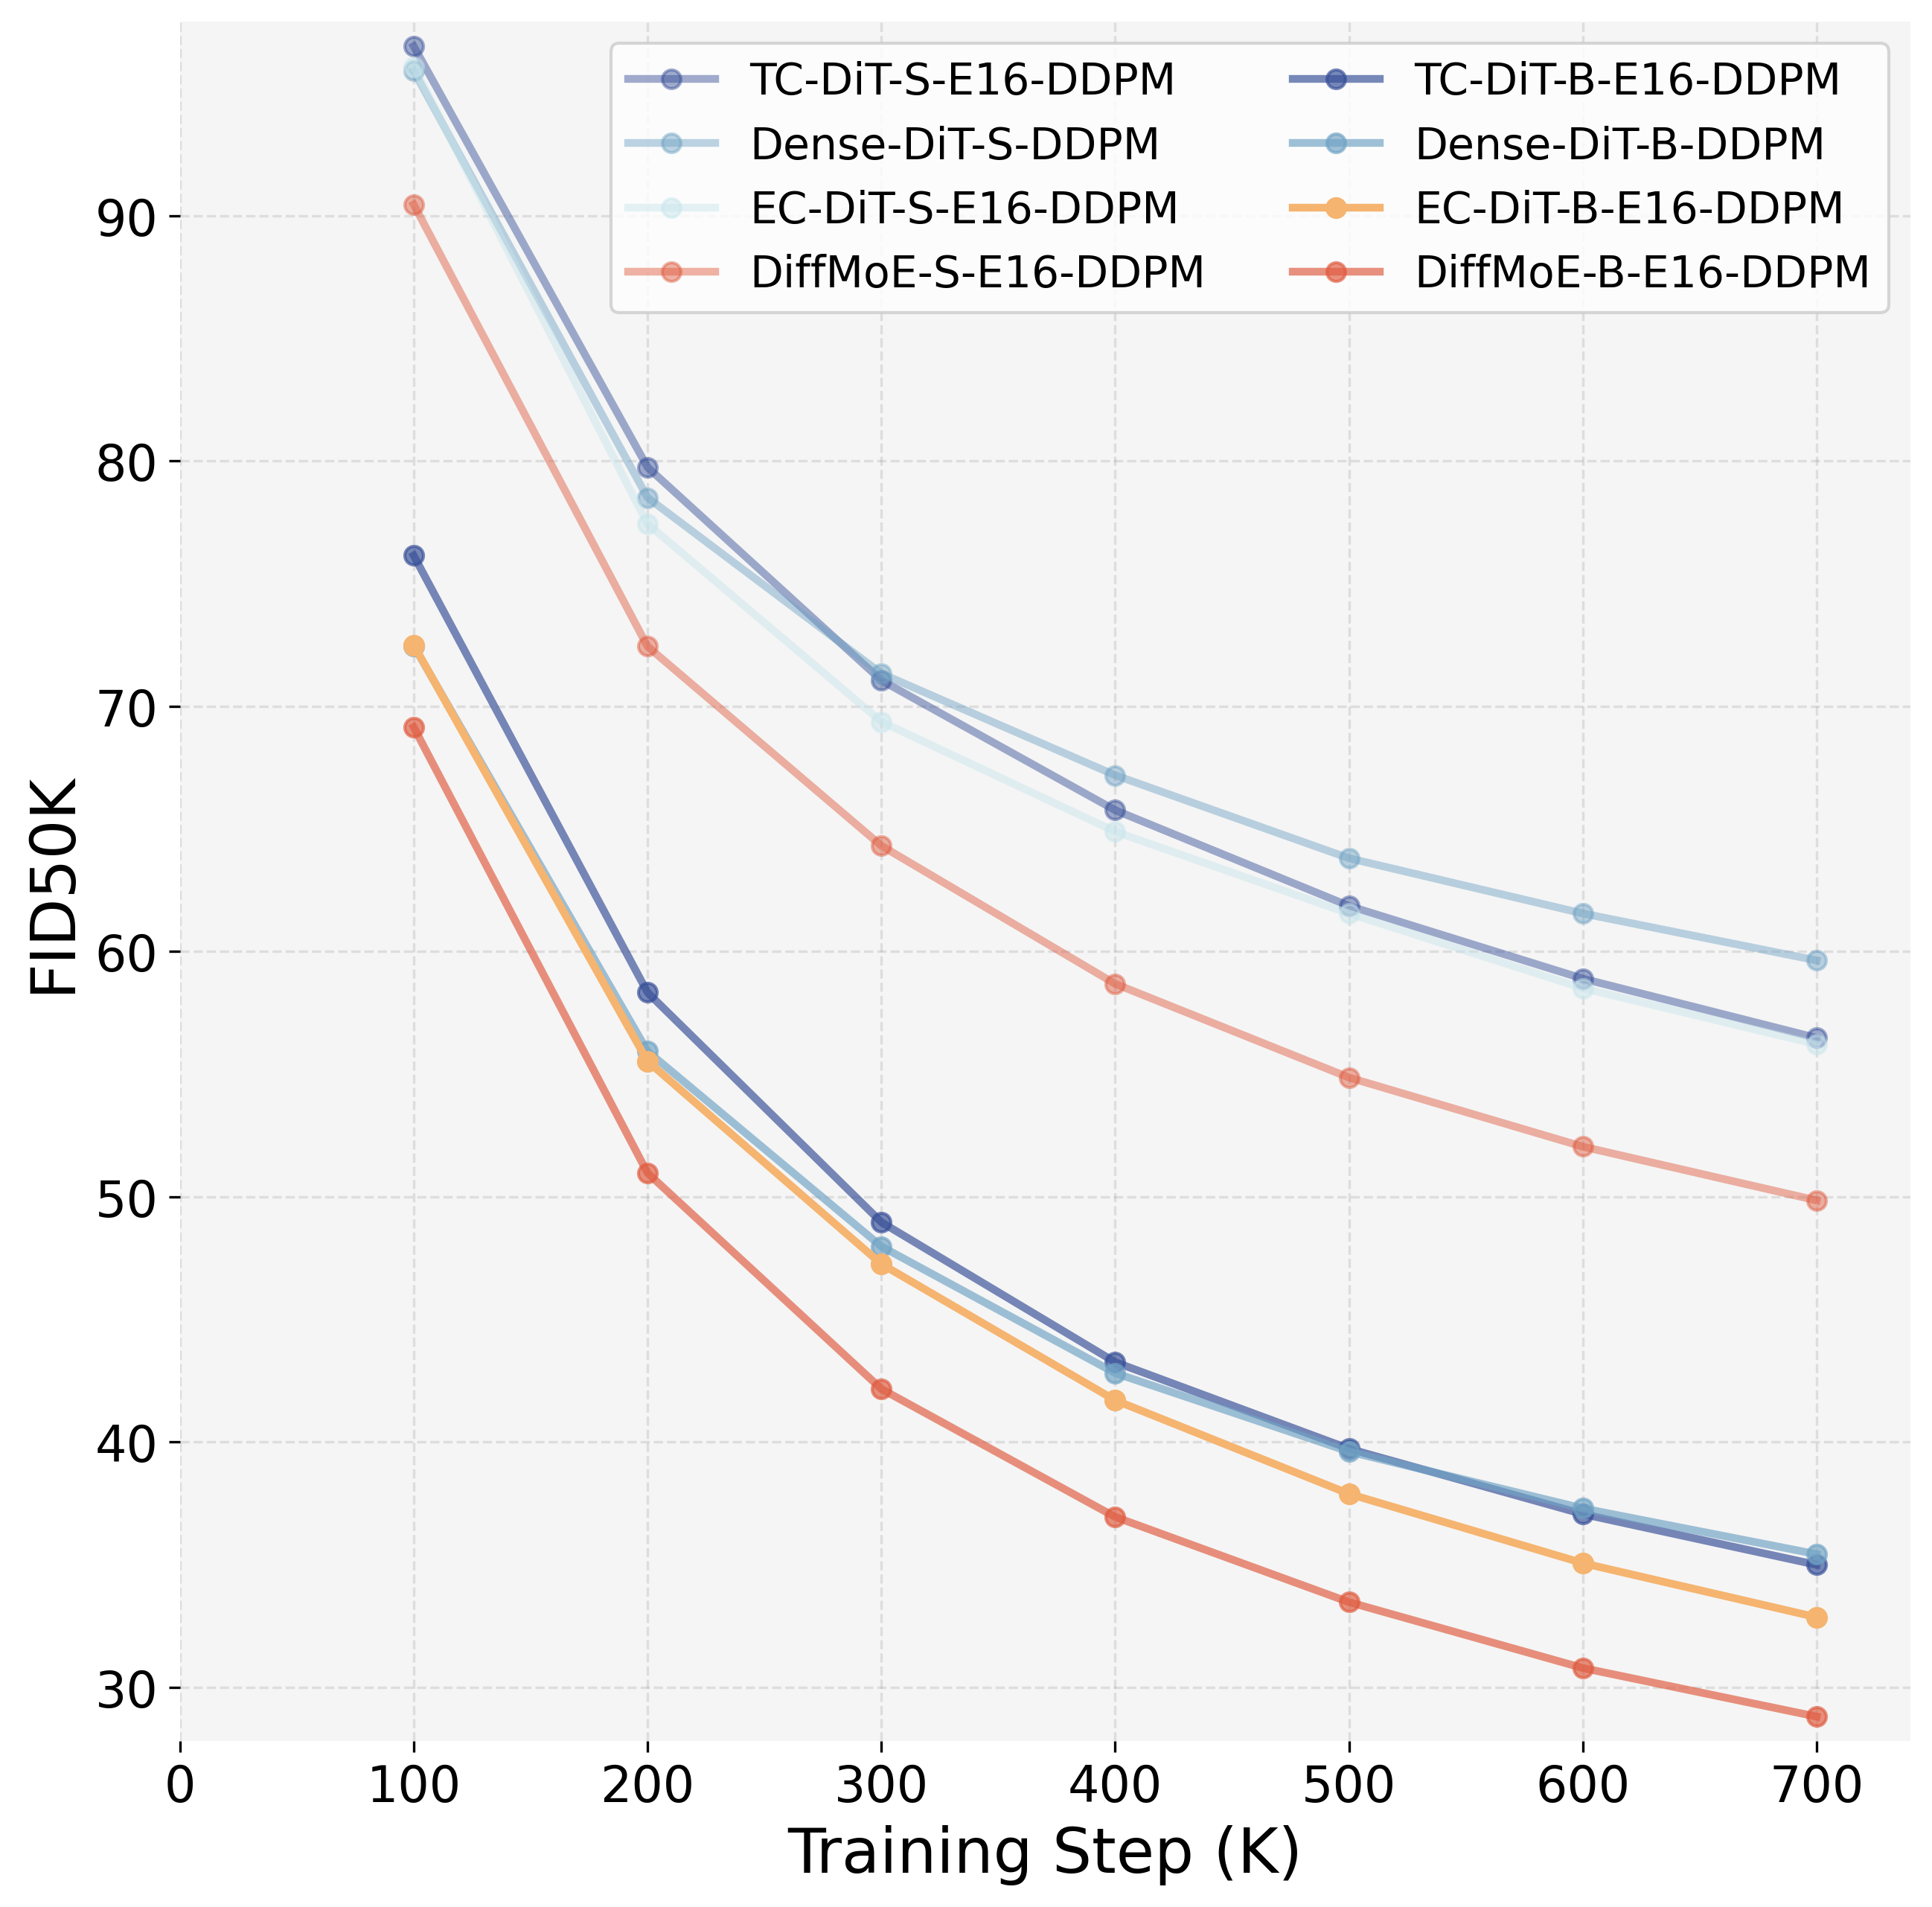

In [21]:
# 示例数据
DiffMoE_S_DDPM_E16_FIDs_Raw = [90.45801377, 72.43800552, 64.31053324, 58.6819359, 54.8621233, 52.04367069, 49.85139208]
DiffMoE_B_DDPM_E16_FIDs_Raw = [69.14647232, 50.97162307, 42.16312705, 36.94610063, 33.47326514, 30.78570621, 28.8048727]
DiffMoE_L_DDPM_E16_FIDs_Raw = [50.5543946, 31.48893661, 23.97279707, 20.17804844, 17.53560087, 15.89531513, 14.59681445]

TCMoE_S_DDPM_E16_FIDs_Raw = [96.91015206, 79.74500765, 71.05587466, 65.76260157, 61.85810979, 58.89364314, 56.47740513]
TCMoE_B_DDPM_E16_FIDs_Raw = [76.14370021, 58.33035927, 48.96267239, 43.25795264, 39.72665162, 37.06311573, 34.9927422]
TCMoE_L_DDPM_E16_FIDs_Raw = [59.44381069, 40.04880579, 31.76399167, 27.51944069, 24.34753132, 22.24939383, 20.80615576]


ECMoE_S_DDPM_E16_FIDs_Raw = [96.07113321, 77.43709036, 69.37131537, 64.88842886, 61.54972709, 58.50416469, 56.21567767]
ECMoE_B_DDPM_E16_FIDs_Raw = [72.4957708, 55.52733475, 47.25836332, 41.7043835, 37.8879877, 35.0626115, 32.85566002]
ECMoE_L_DDPM_E16_FIDs_Raw = [56.08426885, 36.80908405, 28.53610473, 24.11334542, 21.10162008, 19.18052342, 17.64883073]


Dense_S_DDPM_FIDs_Raw = [95.9003645, 78.50703344, 71.33366563, 67.18714089, 63.80303972, 61.55184795, 59.6375848]
Dense_B_DDPM_FIDs_Raw = [72.46634544, 55.93226966, 47.97402223, 42.81087876, 39.60943362, 37.29594239, 35.42795213]
Dense_L_DDPM_FIDs_Raw = [53.24638643, 34.32421489, 27.07981603, 23.29521493, 20.79826735, 18.98839714, 17.87037351]


DiffMoE_S_DDPM_E16_FIDs_Raw = format_data(DiffMoE_S_DDPM_E16_FIDs_Raw, begin=1, name='DiffMoE-S-E16-DDPM')
DiffMoE_B_DDPM_E16_FIDs_Raw = format_data(DiffMoE_B_DDPM_E16_FIDs_Raw, begin=1, name='DiffMoE-B-E16-DDPM')
DiffMoE_L_DDPM_E16_FIDs_Raw = format_data(DiffMoE_L_DDPM_E16_FIDs_Raw, begin=1, name='DiffMoE-L-E16-DDPM')

TCMoE_S_DDPM_E16_FIDs_Raw = format_data(TCMoE_S_DDPM_E16_FIDs_Raw, begin=1, name='TC-DiT-S-E16-DDPM')
TCMoE_B_DDPM_E16_FIDs_Raw = format_data(TCMoE_B_DDPM_E16_FIDs_Raw, begin=1, name='TC-DiT-B-E16-DDPM')
TCMoE_L_DDPM_E16_FIDs_Raw = format_data(TCMoE_L_DDPM_E16_FIDs_Raw, begin=1, name='TC-DiT-L-E16-DDPM')

ECMoE_S_DDPM_E16_FIDs_Raw = format_data(ECMoE_S_DDPM_E16_FIDs_Raw, begin=1, name='EC-DiT-S-E16-DDPM')
ECMoE_B_DDPM_E16_FIDs_Raw = format_data(ECMoE_B_DDPM_E16_FIDs_Raw, begin=1, name='EC-DiT-B-E16-DDPM')
ECMoE_L_DDPM_E16_FIDs_Raw = format_data(ECMoE_L_DDPM_E16_FIDs_Raw, begin=1, name='EC-DiT-SL-E16-DDPM')

Dense_S_DDPM_FIDs_Raw = format_data(Dense_S_DDPM_FIDs_Raw, begin=1, name='Dense-DiT-S-DDPM')
Dense_B_DDPM_FIDs_Raw = format_data(Dense_B_DDPM_FIDs_Raw, begin=1, name='Dense-DiT-B-DDPM')
Dense_L_DDPM_FIDs_Raw = format_data(Dense_L_DDPM_FIDs_Raw, begin=1, name='Dense-DiT-L-DDPM')




DDPM_FIDList = [
                TCMoE_S_DDPM_E16_FIDs_Raw,
                Dense_S_DDPM_FIDs_Raw,
                ECMoE_S_DDPM_E16_FIDs_Raw,
                DiffMoE_S_DDPM_E16_FIDs_Raw,

                TCMoE_B_DDPM_E16_FIDs_Raw,
                Dense_B_DDPM_FIDs_Raw,
                ECMoE_B_DDPM_E16_FIDs_Raw,
                DiffMoE_B_DDPM_E16_FIDs_Raw,

                # TCMoE_L_DDPM_E16_FIDs_Raw,
                # Dense_L_DDPM_FIDs_Raw,
                # ECMoE_L_DDPM_E16_FIDs_Raw,
                # DiffMoE_L_DDPM_E16_FIDs_Raw,

                ]


colors_customized = [
    "#354e9777",  # 深蓝色（更淡）
    "#70a3c477",  # 浅蓝色（更淡）
    "#c7e5ec77",  # 浅蓝色（更淡）
    "#df5b3f77",  # 红色（更淡）

    "#354e97aa",  # 深蓝色（变淡）
    "#70a3c4aa",  # 浅蓝色（变淡）
    # "#c7e5ecaa",  # 浅蓝色（变淡）
    "#f5b46f",  # 浅橙色
    "#df5b3faa",  # 红色（变淡）

    "#354e97",  # 深蓝色（不变）
    "#70a3c4",  # 浅蓝色（不变）
    # "#c7e5ec",  # 浅蓝色（不变）
    "#f5b46f",  # 浅橙色

    "#df5b3f",  # 红色（不变）
]

# 示例调用
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in DDPM_FIDList],
    fid_values_list=[fids['Data'] for fids in DDPM_FIDList],
    labels=[fids['Name'] for fids in DDPM_FIDList],
    marker='o',
    save_path='[Ablation]-2-DDPM-All-Scales.png',
    plot_name='[Ablation] Num Experts: FID10K over Training Step',
    is_ax_inset=False,
    color_codes_begins=0,
    color_codes_end=1000,
    ylabel='FID50K',
    color_codes_reverse=False,
    size=(10, 10),
    ncol=2,
    
    legend_size=14,
    colors=colors_customized
)

{'Data': [65.63837915, 47.88011201, 40.51493101, 36.24625504, 33.36429676, 31.41015095, 29.87901702], 'DataSteps': [100, 200, 300, 400, 500, 600, 700], 'Name': 'Dense-DiT-B-Flow'}
{'Data': [65.98002005, 47.57177235, 39.46342716, 34.64891314, 31.35260897, 29.29147767, 27.39170237], 'DataSteps': [100, 200, 300, 400, 500, 600, 700], 'Name': 'EC-DiT-B-E16-Flow'}
{'Data': [69.94195892, 51.13338271, 42.66093994, 37.96263783, 34.44156233, 32.08720947, 30.28703278], 'DataSteps': [100, 200, 300, 400, 500, 600, 700], 'Name': 'TC-DiT-B-E16-Flow'}
{'Data': [63.46152646, 45.32518384, 37.46346708, 32.89616649, 30.07762557, 27.89949833, 26.31726999], 'DataSteps': [100, 200, 300, 400, 500, 600, 700], 'Name': 'DiffMoE-B-E16-Flow'}


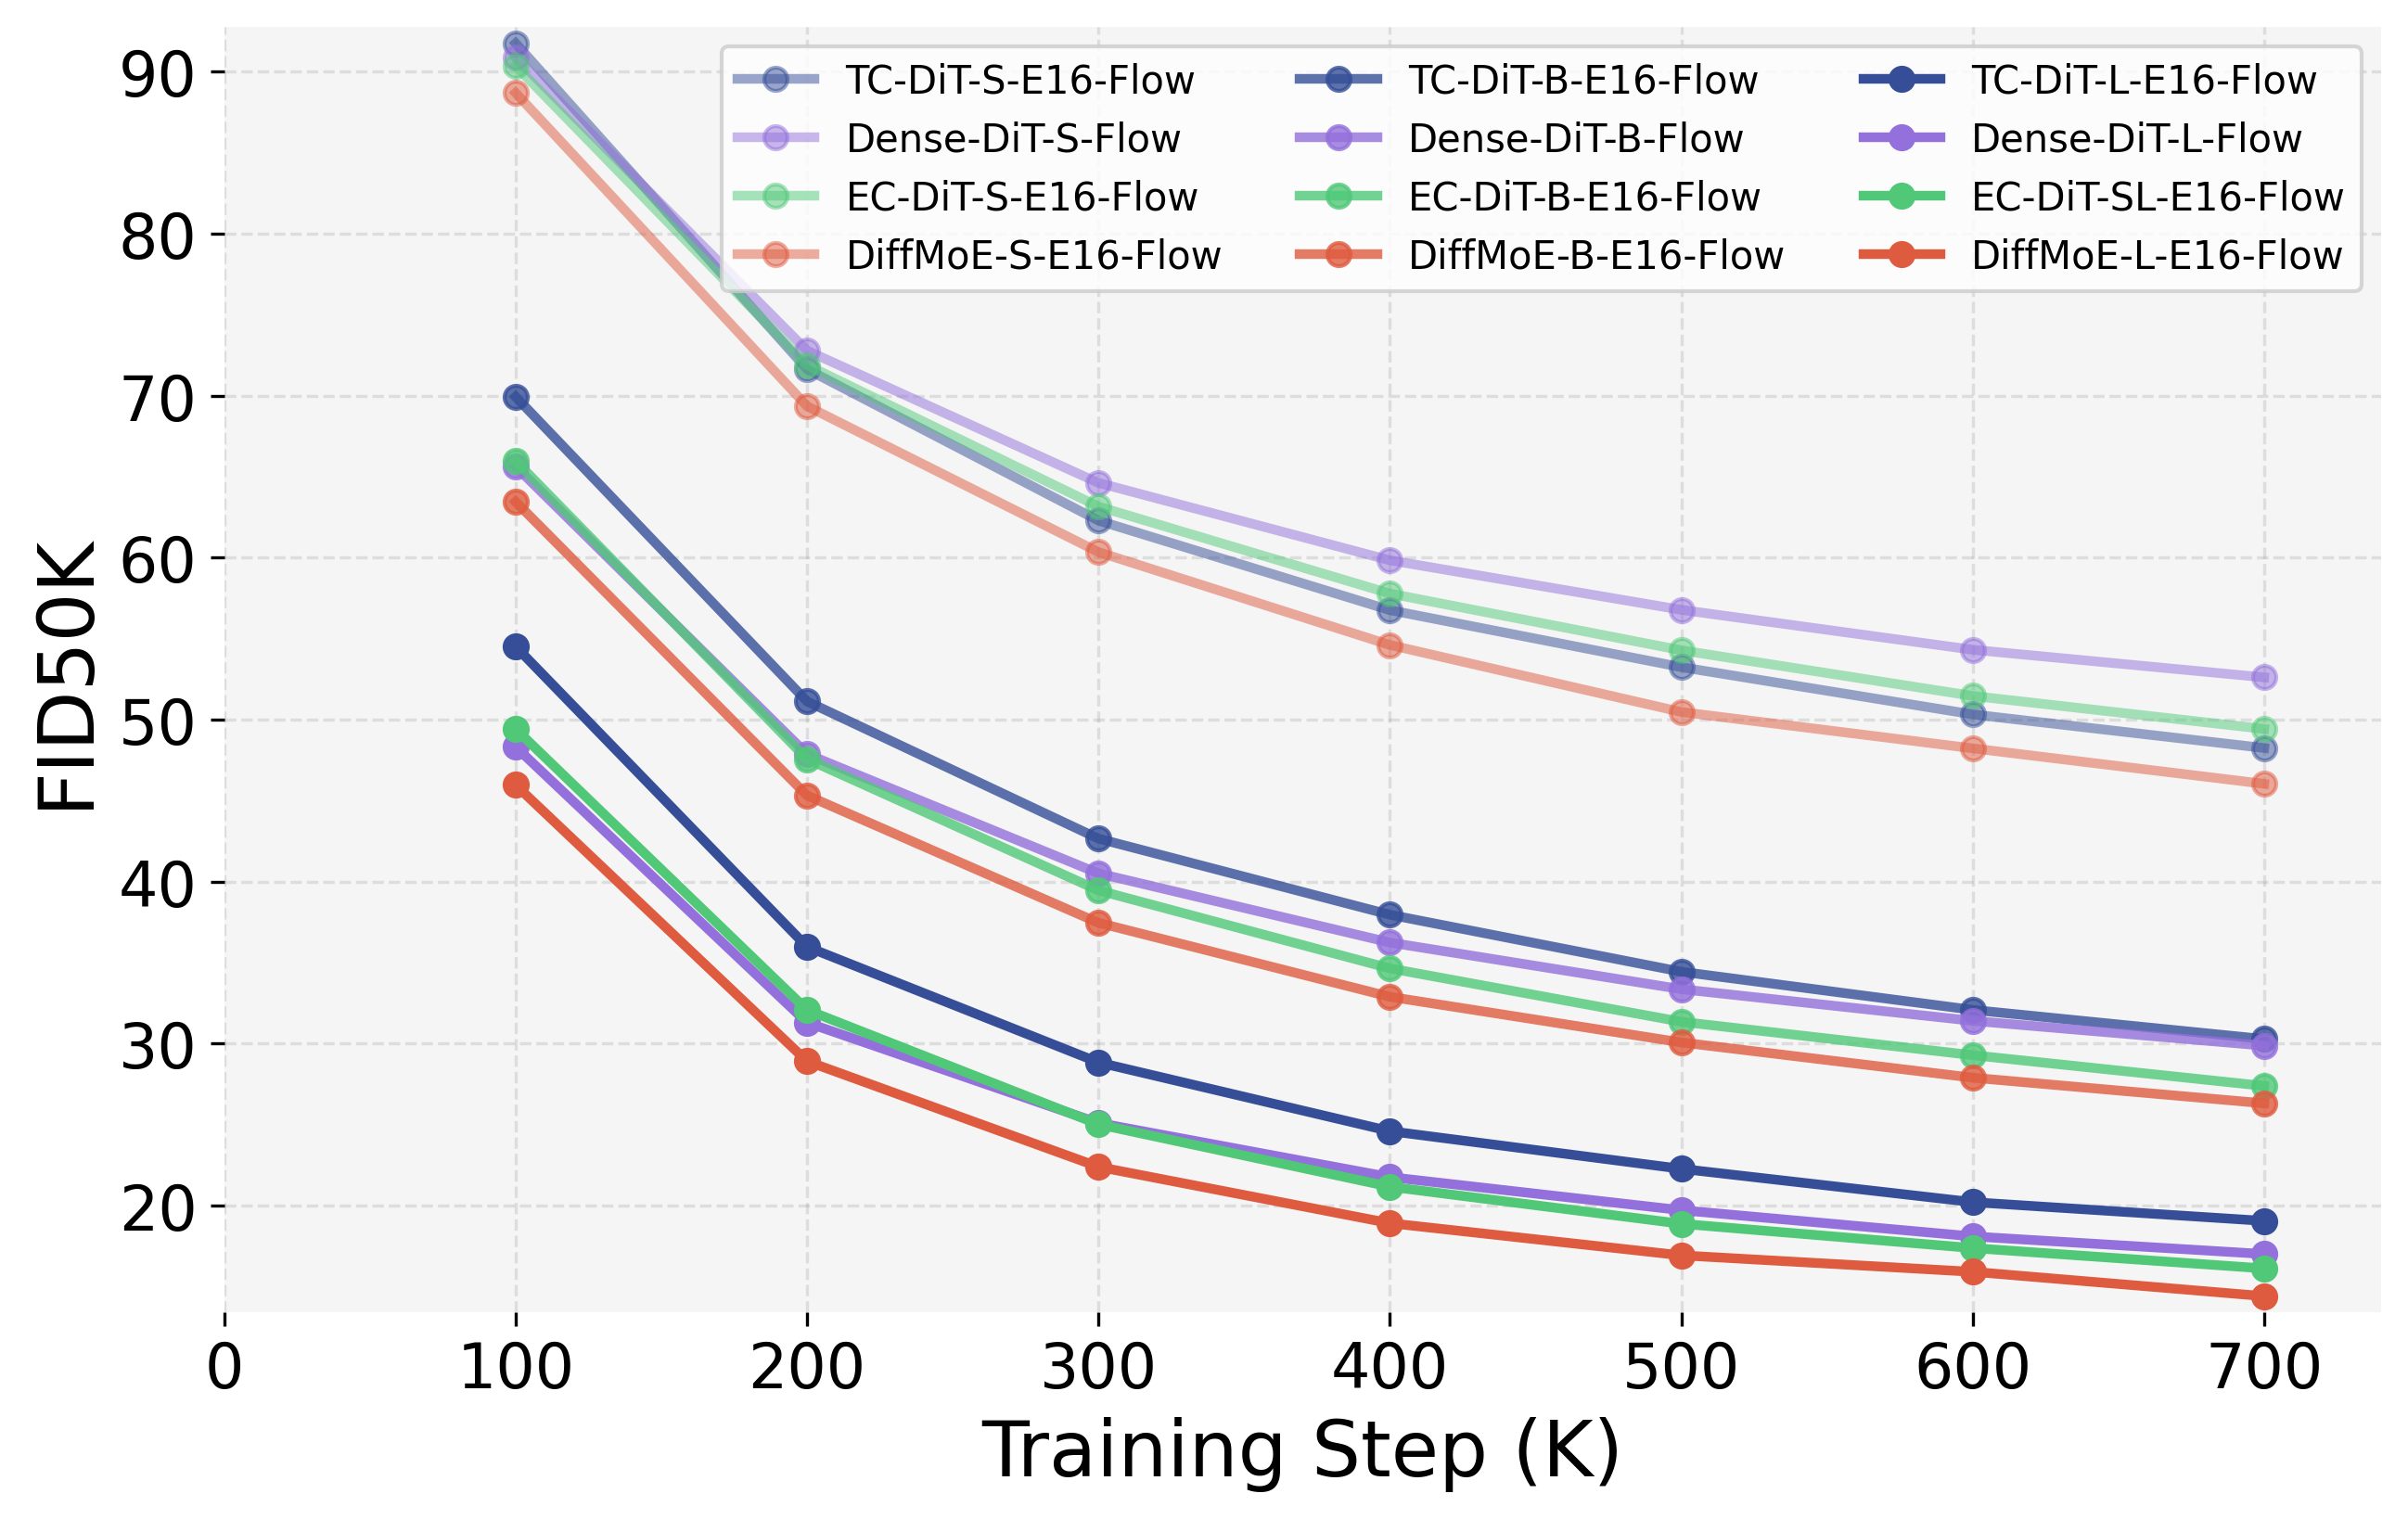

In [22]:
TCMoE_S_Flow_E16_FIDs_Raw = [91.76684977, 71.64101179, 62.29451286, 56.7672507, 53.24729187, 50.32967774, 48.2557975]
ECMoE_S_Flow_E16_FIDs_Raw = [90.37644815, 71.89516754, 63.16023352, 57.79303937, 54.28945824, 51.47084979, 49.42913633]
Dense_S_Flow_FIDs_Raw = [90.89025577, 72.79009937, 64.62451675, 59.84461232, 56.78520761, 54.32139062, 52.61681888]
DiffMoE_S_Flow_E16_FIDs_Raw = [88.70280713, 69.36055741, 60.35195937, 54.61654372, 50.47802318, 48.23402811, 46.04297586]

TCMoE_B_Flow_E16_FIDs_Raw = [69.94195892, 51.13338271, 42.66093994, 37.96263783, 34.44156233, 32.08720947, 30.28703278]
ECMoE_B_Flow_E16_FIDs_Raw = [65.98002005, 47.57177235, 39.46342716, 34.64891314, 31.35260897, 29.29147767, 27.39170237]
Dense_B_Flow_FIDs_Raw =     [65.63837915, 47.88011201, 40.51493101, 36.24625504, 33.36429676, 31.41015095, 29.87901702]
DiffMoE_B_Flow_E16_FIDs_Raw = [63.46152646, 45.32518384, 37.46346708, 32.89616649, 30.07762557, 27.89949833, 26.31726999]

TCMoE_L_Flow_E16_FIDs_Raw = [54.52159118, 35.98070859, 28.84644043, 24.60105372, 22.27345293, 20.21681563, 19.05933139]
ECMoE_L_Flow_E16_FIDs_Raw = [49.43059791, 32.08217953, 25.01991836, 21.16972217, 18.87995066, 17.38135965, 16.12495073]
Dense_L_Flow_FIDs_Raw = [48.32669007, 31.29948878, 25.10670925, 21.76455657, 19.72051702, 18.10241541, 17.01455264]
Dense_X_Flow_FIDs_Raw = [42.6699256, 27.53129435, 21.89157078, 18.80377009, 16.99634972, 15.76212191, 14.76930538]
DiffMoE_L_Flow_E16_FIDs_Raw = [45.97177357, 28.91716321, 22.39651905, 18.91732862, 16.93262975, 15.91671431, 14.41345969]



DiffMoE_S_Flow_E16_FIDs_Raw = format_data(DiffMoE_S_Flow_E16_FIDs_Raw, begin=1, name='DiffMoE-S-E16-Flow')
DiffMoE_B_Flow_E16_FIDs_Raw = format_data(DiffMoE_B_Flow_E16_FIDs_Raw, begin=1, name='DiffMoE-B-E16-Flow')
DiffMoE_L_Flow_E16_FIDs_Raw = format_data(DiffMoE_L_Flow_E16_FIDs_Raw, begin=1, name='DiffMoE-L-E16-Flow')

TCMoE_S_Flow_E16_FIDs_Raw = format_data(TCMoE_S_Flow_E16_FIDs_Raw, begin=1, name='TC-DiT-S-E16-Flow')
TCMoE_B_Flow_E16_FIDs_Raw = format_data(TCMoE_B_Flow_E16_FIDs_Raw, begin=1, name='TC-DiT-B-E16-Flow')
TCMoE_L_Flow_E16_FIDs_Raw = format_data(TCMoE_L_Flow_E16_FIDs_Raw, begin=1, name='TC-DiT-L-E16-Flow')

ECMoE_S_Flow_E16_FIDs_Raw = format_data(ECMoE_S_Flow_E16_FIDs_Raw, begin=1, name='EC-DiT-S-E16-Flow')
ECMoE_B_Flow_E16_FIDs_Raw = format_data(ECMoE_B_Flow_E16_FIDs_Raw, begin=1, name='EC-DiT-B-E16-Flow')
ECMoE_L_Flow_E16_FIDs_Raw = format_data(ECMoE_L_Flow_E16_FIDs_Raw, begin=1, name='EC-DiT-SL-E16-Flow')

Dense_S_Flow_FIDs_Raw = format_data(Dense_S_Flow_FIDs_Raw, begin=1, name='Dense-DiT-S-Flow')
Dense_B_Flow_FIDs_Raw = format_data(Dense_B_Flow_FIDs_Raw, begin=1, name='Dense-DiT-B-Flow')
Dense_L_Flow_FIDs_Raw = format_data(Dense_L_Flow_FIDs_Raw, begin=1, name='Dense-DiT-L-Flow')


print(Dense_B_Flow_FIDs_Raw)
print(ECMoE_B_Flow_E16_FIDs_Raw)
print(TCMoE_B_Flow_E16_FIDs_Raw)
print(DiffMoE_B_Flow_E16_FIDs_Raw)


Flow_FIDList = [
                TCMoE_S_Flow_E16_FIDs_Raw,
                Dense_S_Flow_FIDs_Raw,
                ECMoE_S_Flow_E16_FIDs_Raw,
                DiffMoE_S_Flow_E16_FIDs_Raw,

                TCMoE_B_Flow_E16_FIDs_Raw,
                Dense_B_Flow_FIDs_Raw,
                ECMoE_B_Flow_E16_FIDs_Raw,
                DiffMoE_B_Flow_E16_FIDs_Raw,

                TCMoE_L_Flow_E16_FIDs_Raw,
                Dense_L_Flow_FIDs_Raw,
                ECMoE_L_Flow_E16_FIDs_Raw,
                DiffMoE_L_Flow_E16_FIDs_Raw,

                ]


colors_customized = [
    "#354e9780",
    "#9370db80",
    "#50c87880",
    "#df5b3f80",

    "#354e97cc",
    "#9370dbcc",
    "#50c878cc", 
    "#df5b3fcc",

    "#354e97",  # Dark blue
    "#9370db",  # Medium purple
    "#50c878",  # Emerald green
    "#df5b3f",
]


# 示例调用
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in Flow_FIDList],
    fid_values_list=[fids['Data'] for fids in Flow_FIDList],
    labels=[fids['Name'] for fids in Flow_FIDList],
    marker='o',
    save_path='Ablation-2-Flow-All-Scales.png',
    plot_name='[Ablation] Num Experts: FID10K over Training Step',
    is_ax_inset=False,
    color_codes_begins=0,
    color_codes_end=1000,
    ylabel='FID50K',
    ncol=3,
    legend_size=10,
    color_codes_reverse=False,
    size=(10, 6),
    colors=colors_customized
)

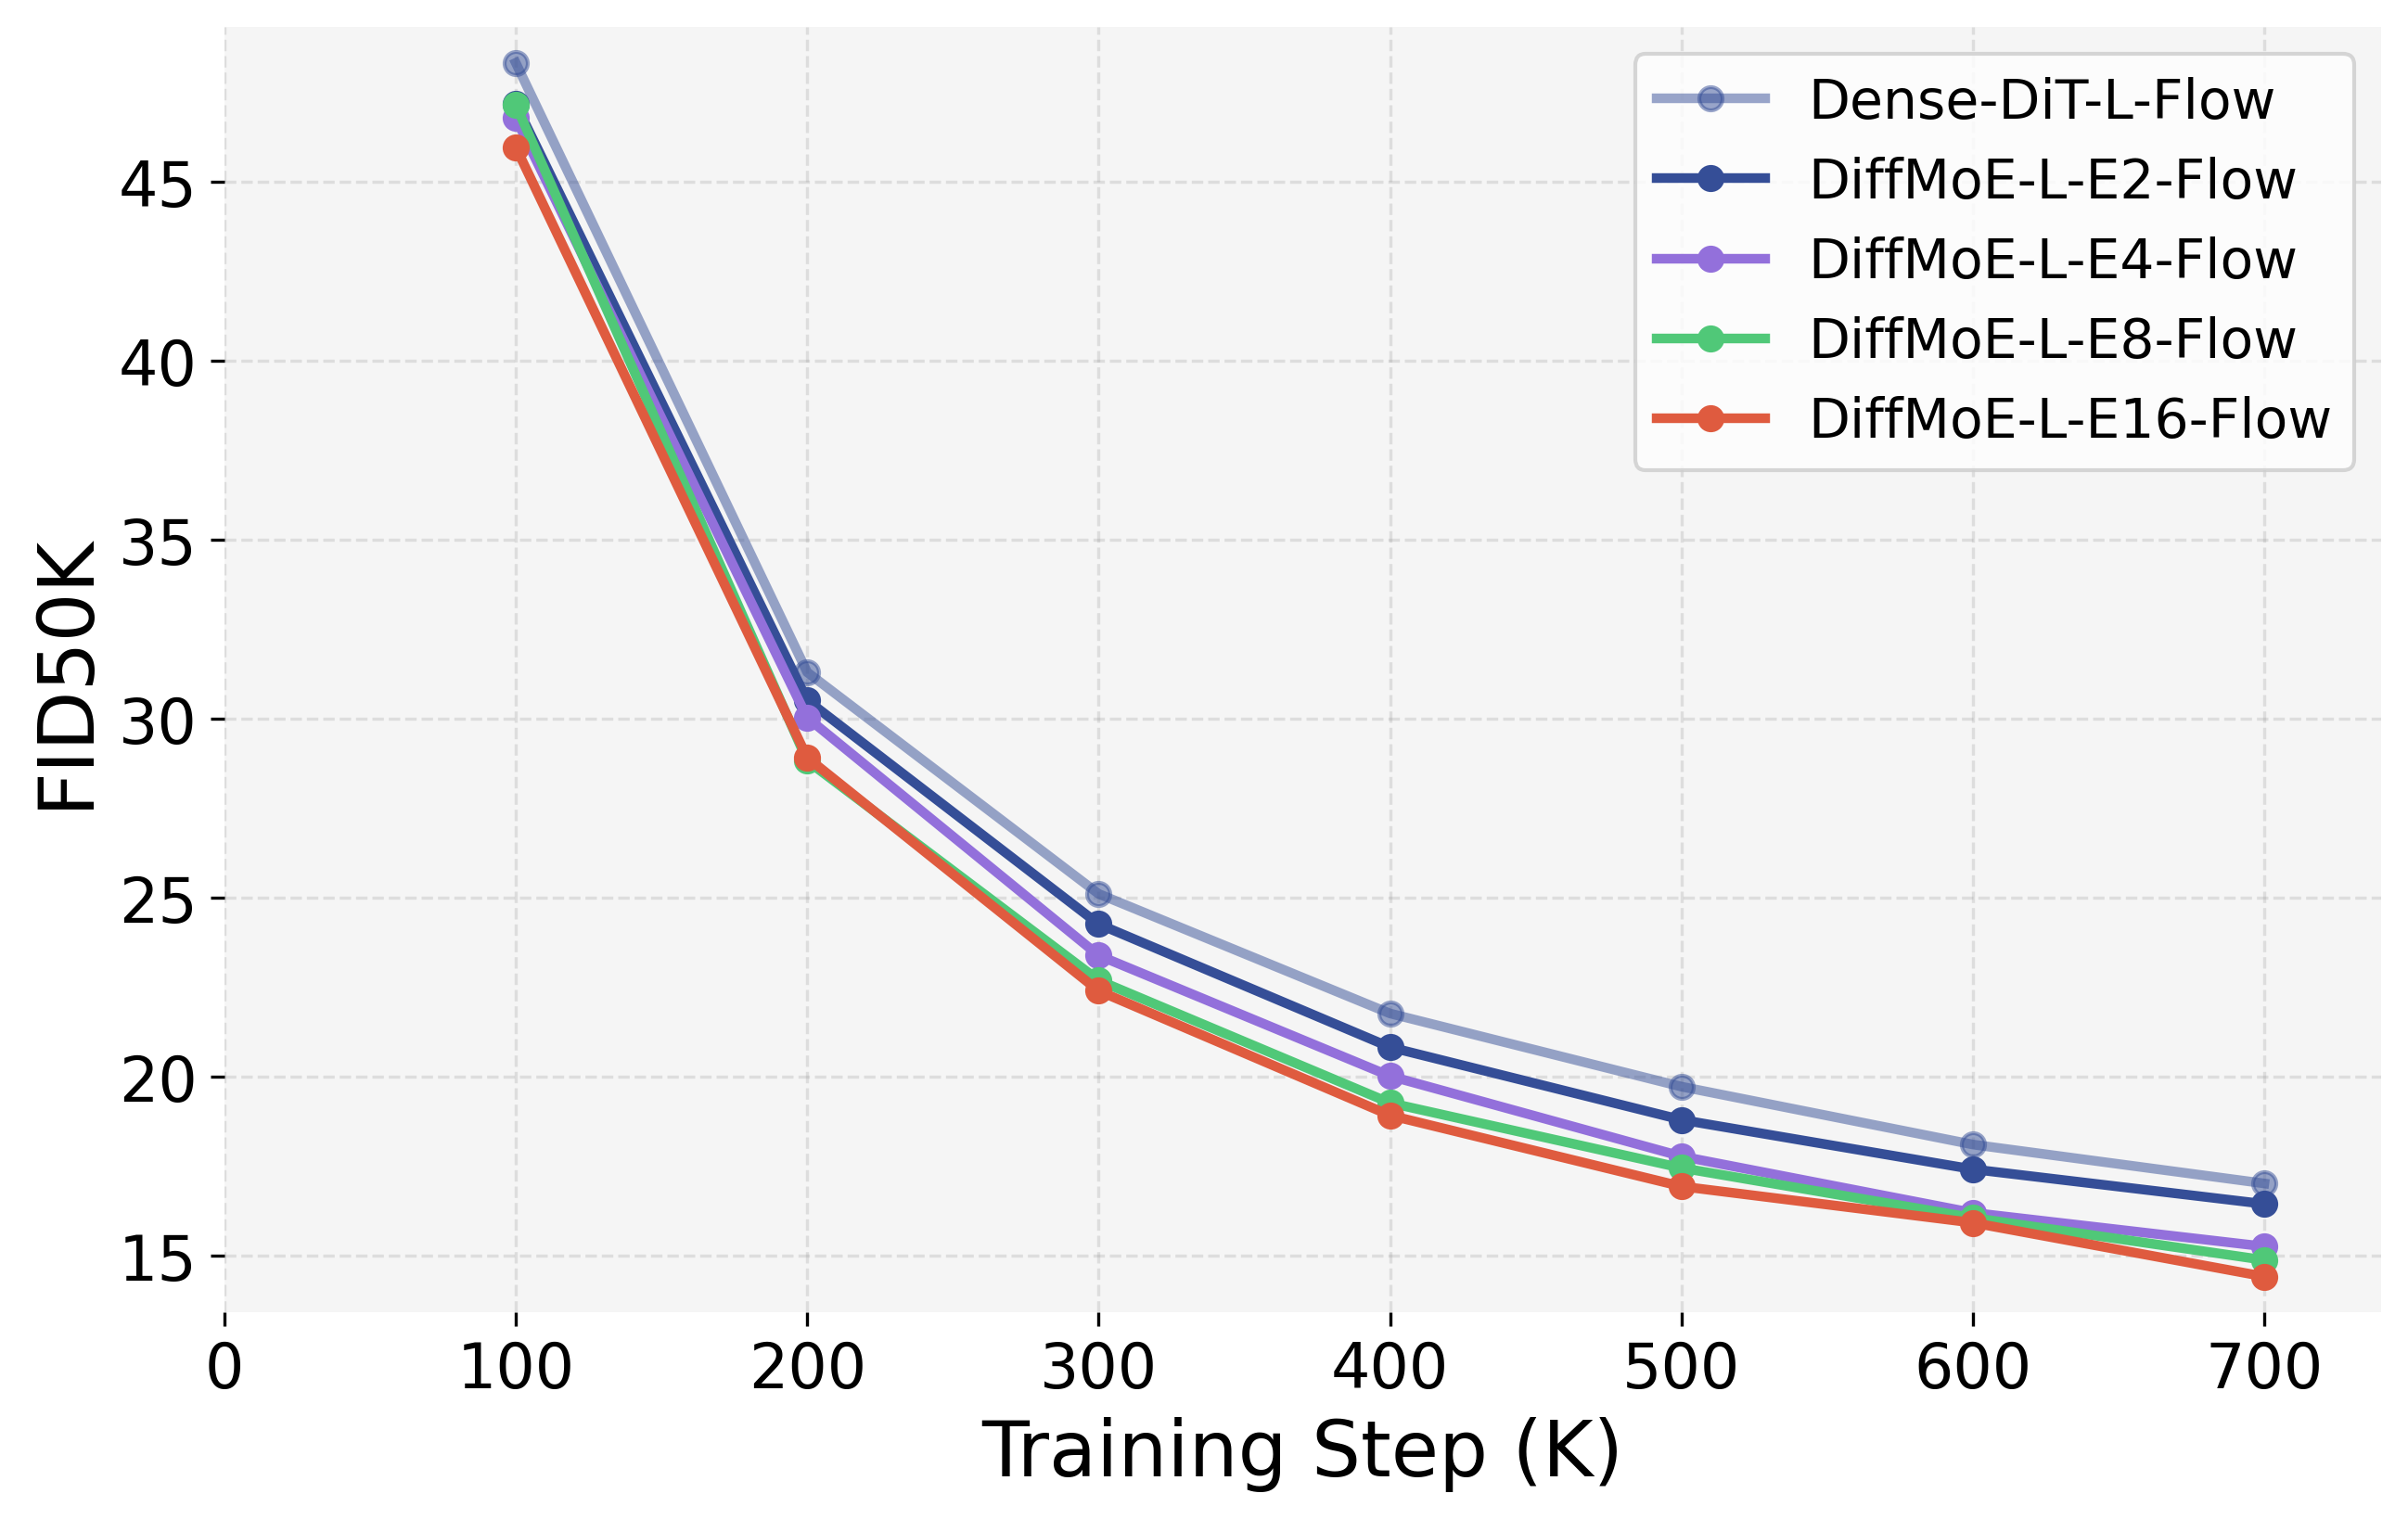

In [30]:
# 示例数据
Flow_DyDiT_E16_ThredDy_FIDs_Raw = [45.97177357, 28.91716321, 22.39651905, 18.91732862, 16.93262975, 15.91671431, 14.41345969]
# Flow_DyDiT_E8_ThredDy_FIDs_Raw_Gbs256Gpu8 = [49.0331194982318, 31.52486890369738, 25.443520439116185, 21.7467314721546, 19.5796945014163, 18.4492575499379]
Flow_DyDiT_E8_ThredDy_FIDs_Raw_Gbs256Gpu4 =[47.15117978, 28.82526043, 22.68970149, 19.26520177, 17.44831513, 16.05591487, 14.87473664]

Flow_DyDiT_E4_ThredDy_FIDs_Raw = [46.78202467, 30.03137668, 23.38689374, 20.01523533, 17.77292171, 16.19668523, 15.25414091]
Flow_DyDiT_E2_ThredDy_FIDs_Raw = [47.17517319, 30.51710501, 24.261812, 20.82218468, 18.79361067, 17.4118291, 16.44217022]


Flow_DiT_Dense_L_2_FIDs_Raw = [48.32669007, 31.29948878, 25.10670925, 21.76455657, 19.72051702, 18.10241541, 17.01455264]

Flow_DiT_Dense_XL_2_FIDs_Raw = [42.6699256, 27.53129435, 21.89157078, 18.80377009, 16.99634972, 15.76212191, 14.76930538]

Flow_DyDiT_E16_ThredDy_FIDs = format_data(Flow_DyDiT_E16_ThredDy_FIDs_Raw, begin=1, name='DiffMoE-L-E16-Flow')
# Flow_DyDiT_E8_ThredDy_FIDs_Gbs256Gpu8 = format_data(Flow_DyDiT_E8_ThredDy_FIDs_Raw_Gbs256Gpu8, begin=1, name='458M_MoE_DyDiT_Flow_E8_Gbs256Gpu8_ThredDy_FID10K')
Flow_DyDiT_E8_ThredDy_FIDs_Gbs256Gpu4 = format_data(Flow_DyDiT_E8_ThredDy_FIDs_Raw_Gbs256Gpu4, begin=1, name='DiffMoE-L-E8-Flow')
Flow_DyDiT_E4_ThredDy_FIDs = format_data(Flow_DyDiT_E4_ThredDy_FIDs_Raw, begin=1, name='DiffMoE-L-E4-Flow')
Flow_DyDiT_E2_ThredDy_FIDs = format_data(Flow_DyDiT_E2_ThredDy_FIDs_Raw, begin=1, name='DiffMoE-L-E2-Flow')
Flow_DyDiT_E1_ThredDy_FIDs = format_data(Flow_DiT_Dense_L_2_FIDs_Raw, begin=1, name='Dense-DiT-L-Flow')
Flow_DiT_Dense_XL_2_FIDs= format_data(Flow_DiT_Dense_XL_2_FIDs_Raw, begin=1, name='Dense-DiT-XL-Flow')


Flow_FIDList = [
                Flow_DyDiT_E1_ThredDy_FIDs,
                Flow_DyDiT_E2_ThredDy_FIDs,
                Flow_DyDiT_E4_ThredDy_FIDs,
                # Flow_DyDiT_E8_ThredDy_FIDs_Gbs256Gpu8,
                Flow_DyDiT_E8_ThredDy_FIDs_Gbs256Gpu4,
                Flow_DyDiT_E16_ThredDy_FIDs, 
                # Flow_DiT_Dense_L_2_FIDs,
                # Flow_DiT_Dense_XL_2_FIDs
                ]


# 调用函数绘制图表
plot_fid_vs_steps(
    steps_list=[fids['DataSteps'] for fids in Flow_FIDList],
    fid_values_list=[fids['Data'] for fids in Flow_FIDList],
    labels=[fids['Name'] for fids in Flow_FIDList],  # 每组数据的标签
    # color_map='tab10',  # 使用 'tab10' 色卡
    marker='o',  # 统一使用圆圈标记
    save_path='Ablation-1-Num_Experts_Fid_vs_Step.png',
    plot_name='[Ablation] Num Experts: FID50K over Training Step',
    ylabel='FID50K',
    is_ax_inset=False,
    legend_size=14,
    ncol=1,
    color_codes_reverse=False,
    size=(10, 6),
    colors=[
    "#354e9780",
    "#354e97",  # Dark blue
    "#9370db",  # Medium purple
    "#50c878",  # Emerald green
    "#df5b3f",
]

)